Name: Michael Welford

In [61]:
# Import required libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
cgfont = {'fontname':'Century Gothic', 'size':18}
cgfont_small = {'fontname':'Century Gothic', 'size':12}
cgfont_smaller = {'fontname':'Century Gothic', 'size':10}
colors = ["#8cb0a3", "#e99812", "#65b460", "#81a2b7"]

In [2]:
# Extract the data.
long_term_care_data = pd.read_csv("../data/Long-Term Care Facility Data.csv")

In [3]:
# Get a preview of the data
long_term_care_data.head(5)

,Facility Name,County,Staff Vaccination Rate,Resident Vaccination Rate,Staff Booster Rate,Resident Booster Rate,Staff Weekly Confirmed Cases,Staff Total Confirmed Cases,Staff Weekly COVID-19 Deaths,Staff Total COVID-19 Deaths,Resident Weekly Confirmed Cases,Resident Total Confirmed Cases,Resident Weekly COVID-19 Deaths,Resident Total COVID-19 Deaths
0,ABBINGTON REHAB & NURSING CTR,DuPage,95.39%,88.68%,44.68%,40.32%,0,27,0,0,3,53,0,7
1,ABINGTON OF GLENVIEW NURSING,Cook,No Value,No Value,No Value,No Value,10,78,0,0,0,69,0,13
2,ACCOLADE HC OF PAXTON ON PELLS,Ford,88.57%,92.93%,91.3%,15.05%,4,53,0,0,0,52,0,6
3,ACCOLADE HEALTHCARE DANVILLE,Vermilion,46.47%,74.44%,58.21%,36.96%,8,94,0,0,3,84,0,10
4,ACCOLADE HEALTHCARE OF PONTIAC,Livingston,82.61%,85.9%,83.58%,38.95%,9,57,0,0,11,67,0,6


In [4]:
# Get info about the data
long_term_care_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703 entries, 0 to 702
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Facility Name                    703 non-null    object
 1   County                           703 non-null    object
 2   Staff Vaccination Rate           703 non-null    object
 3   Resident Vaccination Rate        703 non-null    object
 4   Staff Booster Rate               703 non-null    object
 5   Resident Booster Rate            703 non-null    object
 6   Staff Weekly Confirmed Cases     703 non-null    int64 
 7   Staff Total Confirmed Cases      703 non-null    int64 
 8   Staff Weekly COVID-19 Deaths     703 non-null    int64 
 9   Staff Total COVID-19 Deaths      703 non-null    int64 
 10  Resident Weekly Confirmed Cases  703 non-null    int64 
 11  Resident Total Confirmed Cases   703 non-null    int64 
 12  Resident Weekly COVID-19 Deaths  703

In [5]:
# Get an overall description of the data.
long_term_care_data.describe()

,Staff Weekly Confirmed Cases,Staff Total Confirmed Cases,Staff Weekly COVID-19 Deaths,Staff Total COVID-19 Deaths,Resident Weekly Confirmed Cases,Resident Total Confirmed Cases,Resident Weekly COVID-19 Deaths,Resident Total COVID-19 Deaths
count,703.000000,703.000000,703.0,703.000000,703.000000,703.000000,703.000000,703.000000
mean,2.743954,60.763869,0.0,0.133713,3.132290,66.533428,0.113798,11.019915
std,3.079644,31.405237,0.0,0.479540,5.258651,42.985868,0.411543,10.659701
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,38.000000,0.0,0.000000,0.000000,34.000000,0.000000,4.000000
50%,2.000000,56.000000,0.0,0.000000,1.000000,60.000000,0.000000,8.000000
75%,4.000000,78.000000,0.0,0.000000,4.000000,89.500000,0.000000,16.000000
max,21.000000,206.000000,0.0,5.000000,33.000000,224.000000,4.000000,113.000000


### Define Booleans

In [6]:
# Define booleans to subset the data.
has_resident_vaccination_rate = long_term_care_data['Resident Vaccination Rate'] != 'No Value'
has_staff_vaccination_rate = long_term_care_data['Staff Vaccination Rate'] != 'No Value'

has_resident_booster_rate = long_term_care_data['Resident Booster Rate'] != 'No Value'
has_staff_booster_rate = long_term_care_data['Staff Booster Rate'] != 'No Value'

### Facilities with Missing Data

In [7]:
# No resident vaccination_rate
no_resident_vaccination_rate = long_term_care_data[long_term_care_data['Resident Vaccination Rate'] == 'No Value']
no_resident_vaccination_rate[['Facility Name', 'County']]

,Facility Name,County
1,ABINGTON OF GLENVIEW NURSING,Cook
51,APERION CARE DEKALB,DeKalb
69,APERION CARE PRINCETON,Bureau
107,AVANTARA EVERGREEN PARK,Cook
156,BUCKINGHAM PAVILION,Cook
166,CASEYVILLE NURSING & REHAB CTR,St. Clair
214,DIMENSIONS LIVING PROSPECT HTS,Cook
236,ELMHURST EXTENDED CARE CENTER,DuPage
281,GENERATIONS AT RIVERVIEW,Tazewell
288,GOOD SAMARITAN - PONTIAC,Livingston


In [8]:
# List facilities missing staff vaccination rate.
no_staff_vaccination_rate = long_term_care_data[long_term_care_data['Staff Vaccination Rate'] == 'No Value']
no_staff_vaccination_rate[['Facility Name', 'County']]

,Facility Name,County
1,ABINGTON OF GLENVIEW NURSING,Cook
51,APERION CARE DEKALB,DeKalb
69,APERION CARE PRINCETON,Bureau
107,AVANTARA EVERGREEN PARK,Cook
156,BUCKINGHAM PAVILION,Cook
166,CASEYVILLE NURSING & REHAB CTR,St. Clair
236,ELMHURST EXTENDED CARE CENTER,DuPage
281,GENERATIONS AT RIVERVIEW,Tazewell
288,GOOD SAMARITAN - PONTIAC,Livingston
292,GRANITE NURSING & REHABILITATION,Madison


In [9]:
# No resident booster rate.
no_staff_booster_rate = long_term_care_data[long_term_care_data['Resident Booster Rate'] == 'No Value']
no_staff_booster_rate[['Facility Name', 'County']]

,Facility Name,County
1,ABINGTON OF GLENVIEW NURSING,Cook
51,APERION CARE DEKALB,DeKalb
69,APERION CARE PRINCETON,Bureau
84,ARCADIA CARE DANVILLE,Vermilion
107,AVANTARA EVERGREEN PARK,Cook
118,BEACON CARE AND REHABILITATION,Cook
137,BLESSING HOSPITAL SNU,Adams
150,BRIAR PLACE NURSING,Cook
156,BUCKINGHAM PAVILION,Cook
160,CARLINVILLE REHAB & HCC,Macoupin


In [10]:
# No Staff Booster Rate
no_staff_booster_rate = long_term_care_data[long_term_care_data['Staff Booster Rate'] == 'No Value']
no_staff_booster_rate[['Facility Name', 'County']]

,Facility Name,County
1,ABINGTON OF GLENVIEW NURSING,Cook
41,ALLURE OF STOCKTON,Jo Daviess
51,APERION CARE DEKALB,DeKalb
69,APERION CARE PRINCETON,Bureau
105,AVANTARA AURORA,Kane
107,AVANTARA EVERGREEN PARK,Cook
147,BRIA OF PALOS HILLS,Cook
156,BUCKINGHAM PAVILION,Cook
166,CASEYVILLE NURSING & REHAB CTR,St. Clair
214,DIMENSIONS LIVING PROSPECT HTS,Cook


### Facilites containing complete data

In [11]:
all_data = long_term_care_data[has_resident_vaccination_rate & has_staff_vaccination_rate & has_resident_booster_rate & has_staff_booster_rate]

all_data['Resident Vaccination Rate'] = all_data['Resident Vaccination Rate'].str.rstrip('%').astype(float)
all_data['Staff Vaccination Rate'] = all_data['Staff Vaccination Rate'].str.rstrip('%').astype(float)

all_data['Resident Booster Rate'] = all_data['Resident Booster Rate'].str.rstrip('%').astype(float)
all_data['Staff Booster Rate'] = all_data['Staff Booster Rate'].str.rstrip('%').astype(float)
all_data

C:\Users\thewe\AppData\Local\Temp/ipykernel_31308/4045296744.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Resident Vaccination Rate'] = all_data['Resident Vaccination Rate'].str.rstrip('%').astype(float)
C:\Users\thewe\AppData\Local\Temp/ipykernel_31308/4045296744.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Staff Vaccination Rate'] = all_data['Staff Vaccination Rate'].str.rstrip('%').astype(float)
C:\Users\thewe\AppData\Local\Temp/ipykernel_31308/4045296744.py:6: SettingWi

,Facility Name,County,Staff Vaccination Rate,Resident Vaccination Rate,Staff Booster Rate,Resident Booster Rate,Staff Weekly Confirmed Cases,Staff Total Confirmed Cases,Staff Weekly COVID-19 Deaths,Staff Total COVID-19 Deaths,Resident Weekly Confirmed Cases,Resident Total Confirmed Cases,Resident Weekly COVID-19 Deaths,Resident Total COVID-19 Deaths
0,ABBINGTON REHAB & NURSING CTR,DuPage,95.39,88.68,44.68,40.32,0,27,0,0,3,53,0,7
2,ACCOLADE HC OF PAXTON ON PELLS,Ford,88.57,92.93,91.30,15.05,4,53,0,0,0,52,0,6
3,ACCOLADE HEALTHCARE DANVILLE,Vermilion,46.47,74.44,58.21,36.96,8,94,0,0,3,84,0,10
4,ACCOLADE HEALTHCARE OF PONTIAC,Livingston,82.61,85.90,83.58,38.95,9,57,0,0,11,67,0,6
5,ACCOLADE PAXTON SENIOR LIVING,Ford,88.78,91.30,69.84,2.30,5,59,0,0,5,83,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,WILLOWS HEALTH CENTER,Winnebago,88.42,100.00,100.00,50.79,1,36,0,0,0,8,0,0
699,WINNING WHEELS,Whiteside,67.50,95.06,94.81,33.33,9,65,0,0,0,68,0,4
700,WINSTON MANOR CNV & NURSING,Cook,100.00,95.65,89.39,72.73,2,23,0,0,6,26,0,6
701,WOODBRIDGE NURSING PAVILION,Cook,91.95,91.67,85.80,45.00,0,112,0,0,0,199,0,36


### Facilities with complete initial vaccination data

In [12]:
has_vaccination_data = has_resident_vaccination_rate & has_staff_vaccination_rate
complete_vaccination_data = long_term_care_data[has_vaccination_data]
complete_vaccination_data['Resident Vaccination Rate'] = complete_vaccination_data['Resident Vaccination Rate'].str.rstrip('%').astype(float)
complete_vaccination_data['Staff Vaccination Rate'] = complete_vaccination_data['Staff Vaccination Rate'].str.rstrip('%').astype(float)
complete_vaccination_data

C:\Users\thewe\AppData\Local\Temp/ipykernel_31308/3824917352.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_vaccination_data['Resident Vaccination Rate'] = complete_vaccination_data['Resident Vaccination Rate'].str.rstrip('%').astype(float)
C:\Users\thewe\AppData\Local\Temp/ipykernel_31308/3824917352.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_vaccination_data['Staff Vaccination Rate'] = complete_vaccination_data['Staff Vaccination Rate'].str.rstrip('%').astype(float)


,Facility Name,County,Staff Vaccination Rate,Resident Vaccination Rate,Staff Booster Rate,Resident Booster Rate,Staff Weekly Confirmed Cases,Staff Total Confirmed Cases,Staff Weekly COVID-19 Deaths,Staff Total COVID-19 Deaths,Resident Weekly Confirmed Cases,Resident Total Confirmed Cases,Resident Weekly COVID-19 Deaths,Resident Total COVID-19 Deaths
0,ABBINGTON REHAB & NURSING CTR,DuPage,95.39,88.68,44.68%,40.32%,0,27,0,0,3,53,0,7
2,ACCOLADE HC OF PAXTON ON PELLS,Ford,88.57,92.93,91.3%,15.05%,4,53,0,0,0,52,0,6
3,ACCOLADE HEALTHCARE DANVILLE,Vermilion,46.47,74.44,58.21%,36.96%,8,94,0,0,3,84,0,10
4,ACCOLADE HEALTHCARE OF PONTIAC,Livingston,82.61,85.90,83.58%,38.95%,9,57,0,0,11,67,0,6
5,ACCOLADE PAXTON SENIOR LIVING,Ford,88.78,91.30,69.84%,2.3%,5,59,0,0,5,83,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,WILLOWS HEALTH CENTER,Winnebago,88.42,100.00,100%,50.79%,1,36,0,0,0,8,0,0
699,WINNING WHEELS,Whiteside,67.50,95.06,94.81%,33.33%,9,65,0,0,0,68,0,4
700,WINSTON MANOR CNV & NURSING,Cook,100.00,95.65,89.39%,72.73%,2,23,0,0,6,26,0,6
701,WOODBRIDGE NURSING PAVILION,Cook,91.95,91.67,85.8%,45%,0,112,0,0,0,199,0,36


## Correlation Studies

### Facilities with Vaccination Data

In [13]:
# Get the correlations for the facilities with complete data.
corr = complete_vaccination_data.corr()

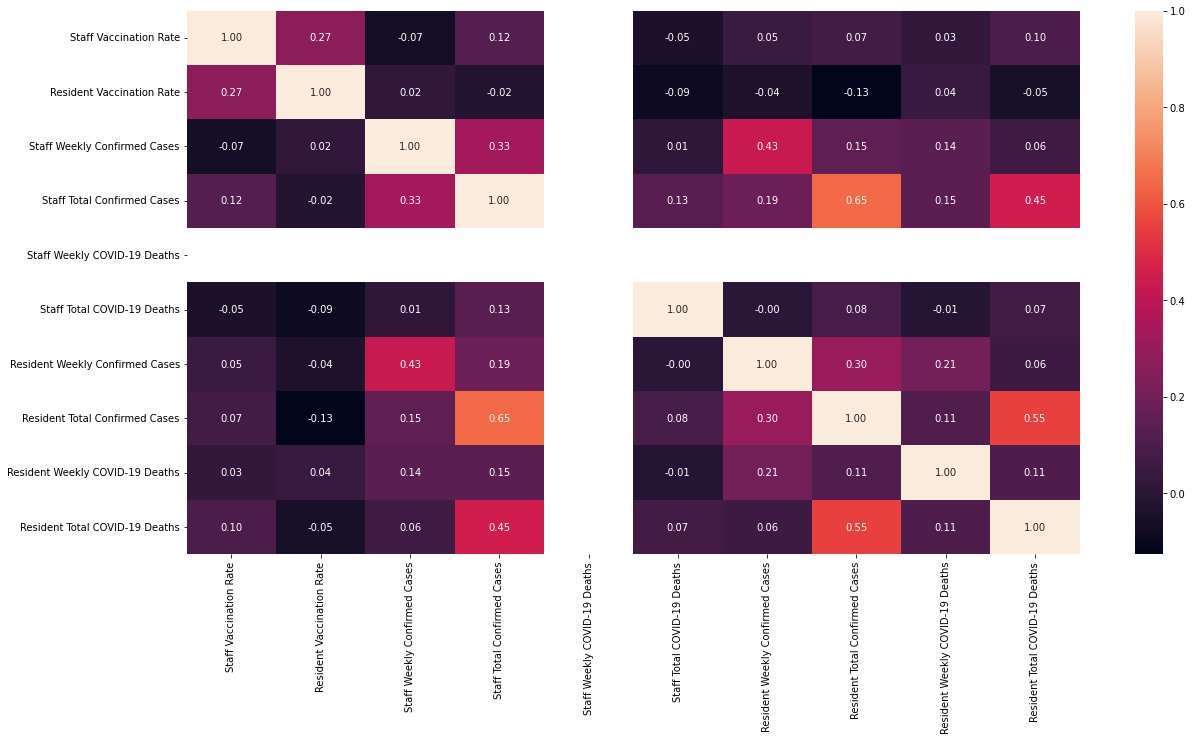

In [14]:
# Show the correlation headmap for the features.
plt.figure(figsize = (20,10))
fig = sns.heatmap(corr, annot=True, fmt='.2f')

### Facilities with Complete Information

In [15]:
# Get the correlations for the facilities with complete data.
corr = all_data.corr()

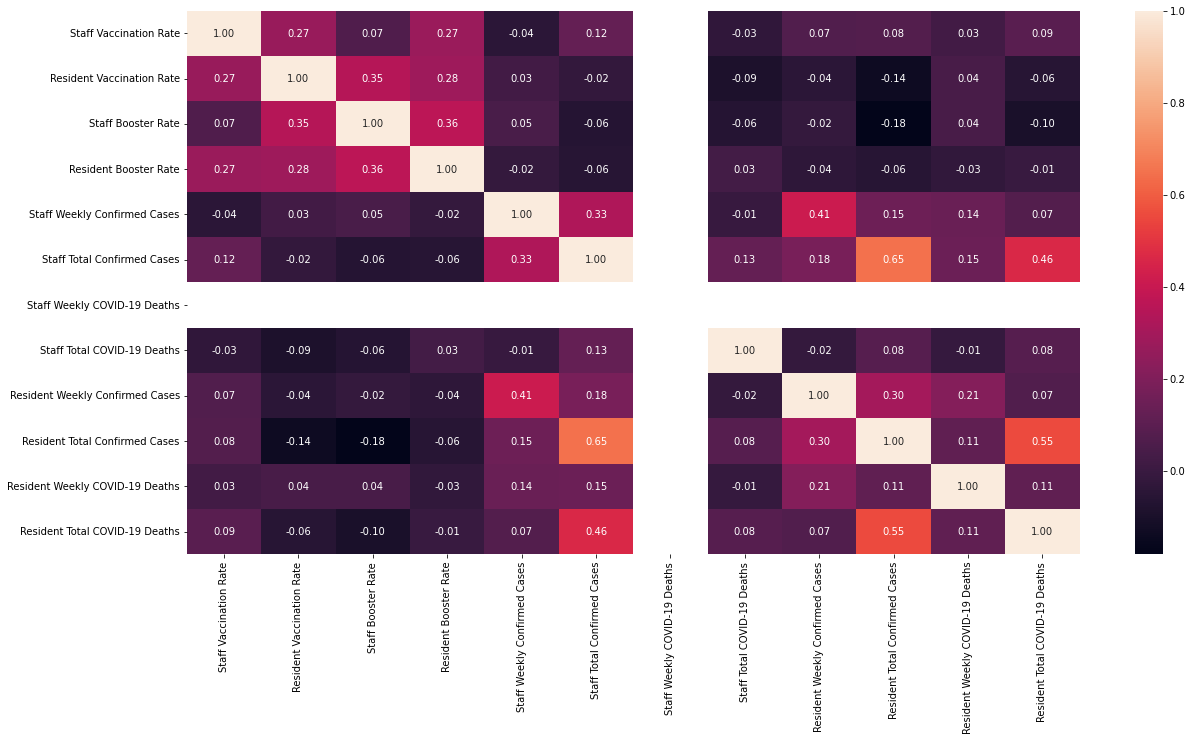

In [16]:
# Show the correlation heatmap for the features.
plt.figure(figsize = (20,10))
fig = sns.heatmap(corr, annot=True, fmt='.2f')

In [17]:
# Lowest Staff Vaccination Rate
all_data.sort_values('Staff Vaccination Rate', ascending=True).head(5)

,Facility Name,County,Staff Vaccination Rate,Resident Vaccination Rate,Staff Booster Rate,Resident Booster Rate,Staff Weekly Confirmed Cases,Staff Total Confirmed Cases,Staff Weekly COVID-19 Deaths,Staff Total COVID-19 Deaths,Resident Weekly Confirmed Cases,Resident Total Confirmed Cases,Resident Weekly COVID-19 Deaths,Resident Total COVID-19 Deaths
676,WASHINGTON SENIOR LIVING,Tazewell,15.39,90.24,90.54,50.00,0,50,0,0,0,81,0,12
466,MOWEAQUA REHAB & HCC,Shelby,25.30,82.93,52.94,9.52,11,62,0,0,6,51,0,3
361,HILLSBORO REHAB & HCC,Montgomery,31.11,94.29,3.03,7.14,8,126,0,4,0,91,0,29
179,CISNE REHABILITATION & HEALTH CENTER,Wayne,35.56,80.95,88.24,18.75,0,29,0,0,0,20,0,2
562,RIVER CROSSING OF PEORIA,Peoria,39.05,69.23,72.22,26.83,3,40,0,0,0,51,0,14


In [18]:
# Highest Vaccination and Booster Rate
all_data.sort_values(['Staff Vaccination Rate', 'Resident Vaccination Rate', 'Resident Booster Rate', 'Staff Booster Rate'], ascending=False).head(20)

,Facility Name,County,Staff Vaccination Rate,Resident Vaccination Rate,Staff Booster Rate,Resident Booster Rate,Staff Weekly Confirmed Cases,Staff Total Confirmed Cases,Staff Weekly COVID-19 Deaths,Staff Total COVID-19 Deaths,Resident Weekly Confirmed Cases,Resident Total Confirmed Cases,Resident Weekly COVID-19 Deaths,Resident Total COVID-19 Deaths
75,APERION CARE WESTCHESTER,Cook,100.0,100.00,75.00,82.67,5,34,0,0,4,38,0,9
438,"MATHER EVANSTON, THE",Cook,100.0,100.00,100.00,82.41,0,37,0,0,0,17,0,3
659,VI AT THE GLEN,Cook,100.0,100.00,97.56,67.97,5,44,0,0,0,18,1,8
582,SELFHELP HOME OF CHICAGO,Cook,100.0,100.00,86.00,50.00,3,62,0,0,0,19,0,3
407,LIBERTYVILLE MANOR EXT CARE,Lake,100.0,100.00,82.86,44.26,4,32,0,0,1,31,0,15
154,"BRITISH HOME, THE",Cook,100.0,100.00,100.00,25.00,4,83,0,0,2,21,1,1
592,SMITH CROSSING,Cook,100.0,100.00,62.79,22.22,1,79,0,0,1,19,0,0
92,ASCENSION HERITAGE VILLAGE,Kankakee,100.0,100.00,100.00,14.29,0,42,0,0,1,15,0,0
459,MOMENCE MEADOWS NURSING & REHAB,Kankakee,100.0,100.00,48.94,12.16,0,37,0,0,0,48,0,6
297,"GROVE AT THE LAKE,THE",Lake,100.0,99.23,87.50,63.09,10,178,0,0,10,43,0,86


### Counties by Staff Vaccination Rates

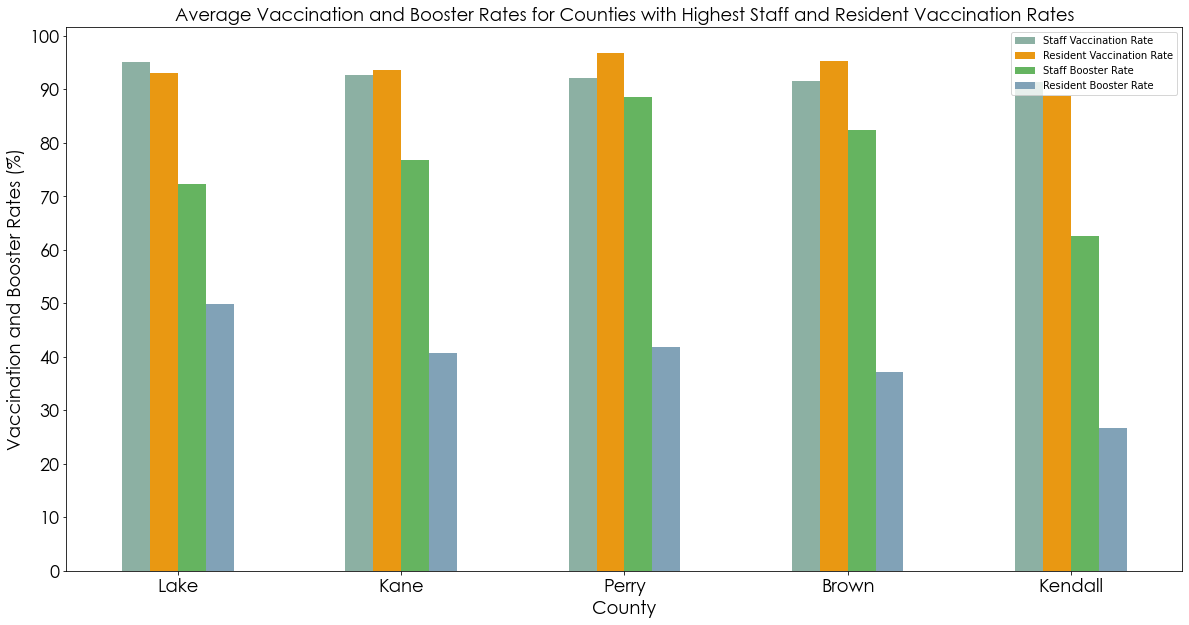

,Staff Vaccination Rate,Resident Vaccination Rate,Staff Booster Rate,Resident Booster Rate
County,,,,
Lake,95.132609,93.062174,72.266522,49.955652
Kane,92.760833,93.546250,76.718333,40.752500
Perry,92.066667,96.796667,88.626667,41.923333
Brown,91.490000,95.240000,82.500000,37.210000
Kendall,91.355000,88.780000,62.655000,26.680000


In [19]:
# Plot COVID-19 Attributes for Counties with Highest Staff and Resident Vaccination Rates
rates = ['Staff Vaccination Rate', 'Resident Vaccination Rate', 'Staff Booster Rate', 'Resident Booster Rate']
all_data.groupby('County').mean().sort_values(rates, ascending=False)[rates].head(5).plot(kind='bar', figsize=(20,10), color=colors)
plt.title("Average Vaccination and Booster Rates for Counties with Highest Staff and Resident Vaccination Rates", **cgfont)
plt.xlabel("County",**cgfont)
plt.yticks((0,10,20,30,40,50,60,70,80,90,100), **cgfont)
plt.ylabel("Vaccination and Booster Rates (%)", **cgfont)
plt.xticks(**cgfont, rotation=0)
plt.show()
all_data.groupby('County').mean().sort_values(rates, ascending=False)[rates].head(5)

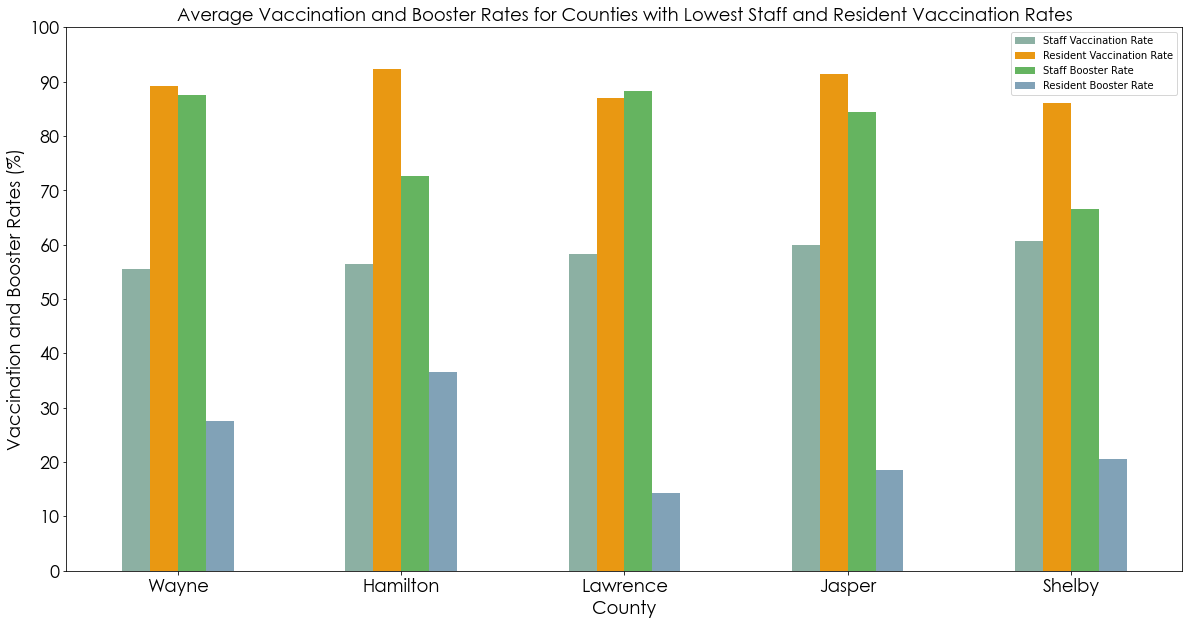

In [20]:
# Plot COVID-19 Attributes for Counties with Highest Staff and Resident Vaccination Rates
rates = ['Staff Vaccination Rate', 'Resident Vaccination Rate', 'Staff Booster Rate', 'Resident Booster Rate']
all_data.groupby('County').mean().sort_values(rates, ascending=True)[rates].head(5).plot(kind='bar', figsize=(20,10), color=colors)
plt.title("Average Vaccination and Booster Rates for Counties with Lowest Staff and Resident Vaccination Rates", **cgfont)
plt.xlabel("County",**cgfont)
plt.yticks(ticks=(0,10,20,30,40,50,60,70,80,90,100), **cgfont)
plt.ylabel("Vaccination and Booster Rates (%)", **cgfont)
plt.xticks(**cgfont, rotation=0)
plt.show()

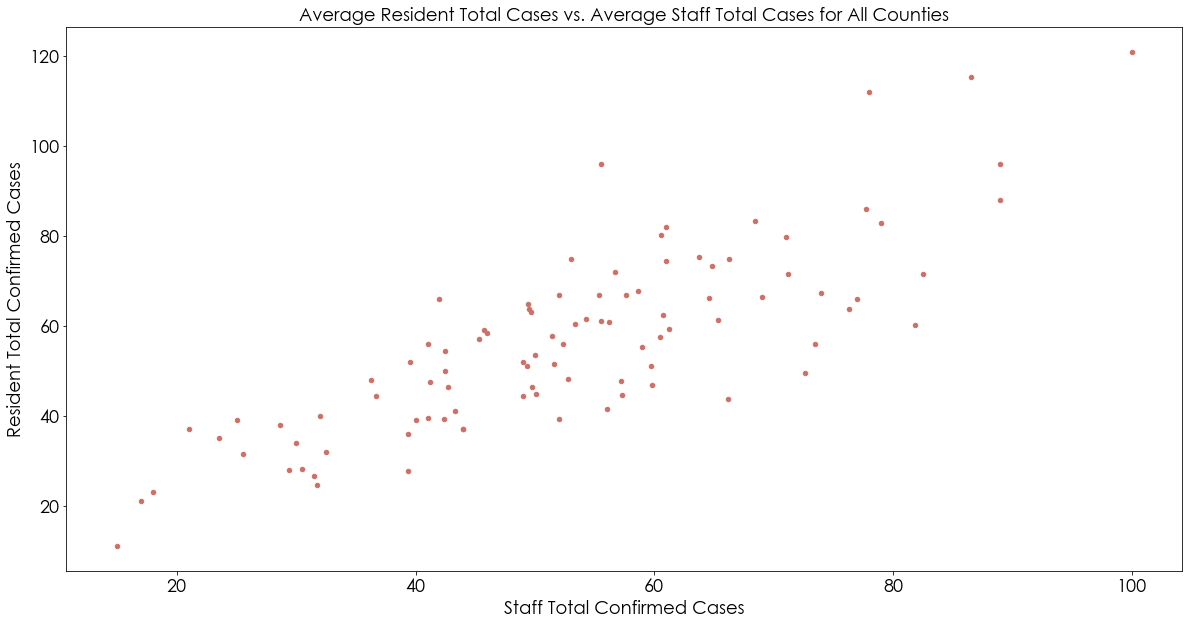

In [21]:
# Plot Average Resident Total Cases vs. Average Staff Total Cases for All Counties
long_term_care_data.groupby('County').mean().plot('Staff Total Confirmed Cases','Resident Total Confirmed Cases', kind='scatter', figsize=(20,10), color="#CE7067")
plt.title("Average Resident Total Cases vs. Average Staff Total Cases for All Counties", **cgfont)
plt.xlabel('Staff Total Confirmed Cases', **cgfont)
plt.ylabel('Resident Total Confirmed Cases', **cgfont)
plt.xticks(**cgfont)
plt.yticks(**cgfont)
plt.savefig("../plots/Average_Resident_Total_Case_vs_Average_Staff_Total_Cases.png")
plt.show()

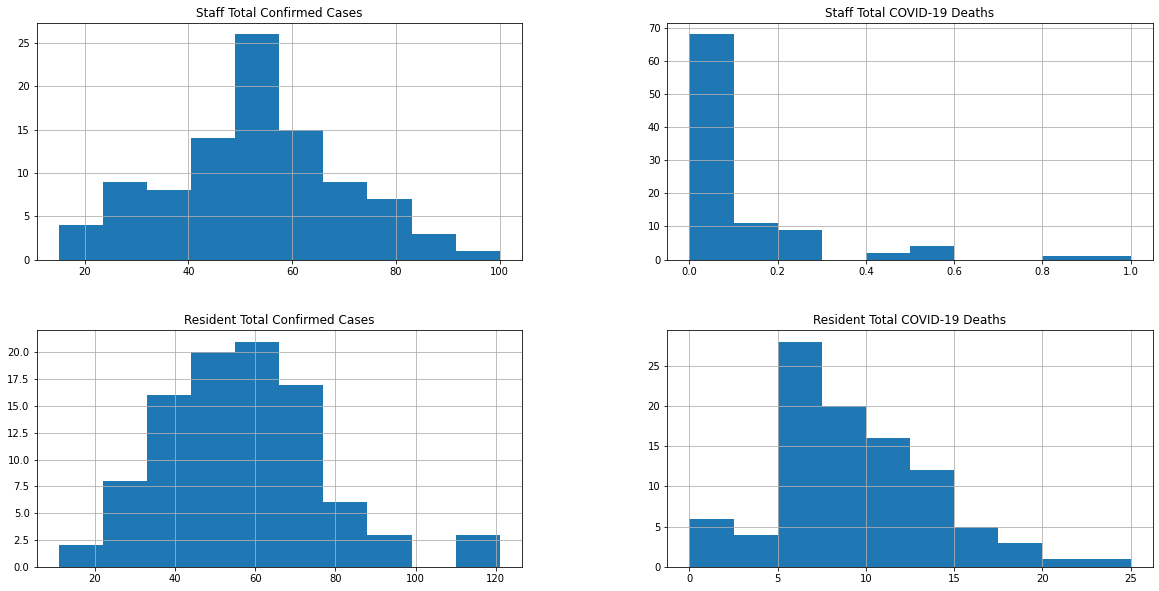

In [22]:
# Plot County level histograms.
long_term_care_data.groupby('County').mean().drop(['Staff Weekly COVID-19 Deaths', 'Staff Weekly Confirmed Cases', 
                                                   'Resident Weekly Confirmed Cases', 'Resident Weekly COVID-19 Deaths'], axis=1).hist(figsize=(20,10))

plt.show()

In [23]:
all_data.groupby('County').mean()

,Staff Vaccination Rate,Resident Vaccination Rate,Staff Booster Rate,Resident Booster Rate,Staff Weekly Confirmed Cases,Staff Total Confirmed Cases,Staff Weekly COVID-19 Deaths,Staff Total COVID-19 Deaths,Resident Weekly Confirmed Cases,Resident Total Confirmed Cases,Resident Weekly COVID-19 Deaths,Resident Total COVID-19 Deaths
County,,,,,,,,,,,,
Adams,70.652000,92.816000,80.684000,31.864000,3.400000,90.000000,0.0,0.000000,1.000000,68.800000,0.000000,11.200000
Bond,82.350000,83.330000,87.500000,41.070000,2.000000,42.000000,0.0,0.000000,5.000000,66.000000,0.000000,12.000000
Boone,90.336667,87.236667,88.356667,39.140000,1.333333,53.333333,0.0,0.000000,1.000000,60.333333,0.333333,14.666667
Brown,91.490000,95.240000,82.500000,37.210000,1.000000,30.000000,0.0,0.000000,0.000000,34.000000,0.000000,11.000000
Bureau,85.336667,89.706667,85.483333,33.640000,3.333333,48.333333,0.0,0.000000,2.000000,64.000000,0.333333,8.666667
...,...,...,...,...,...,...,...,...,...,...,...,...
Whiteside,83.612500,90.965000,79.277500,36.925000,2.625000,41.250000,0.0,0.500000,1.125000,47.625000,0.250000,7.875000
Will,82.879444,88.628333,69.475556,26.302778,2.722222,77.722222,0.0,0.222222,3.333333,86.000000,0.055556,14.055556
Williamson,83.902500,76.540000,69.545000,16.812500,3.000000,46.500000,0.0,0.000000,3.000000,59.500000,0.500000,8.750000


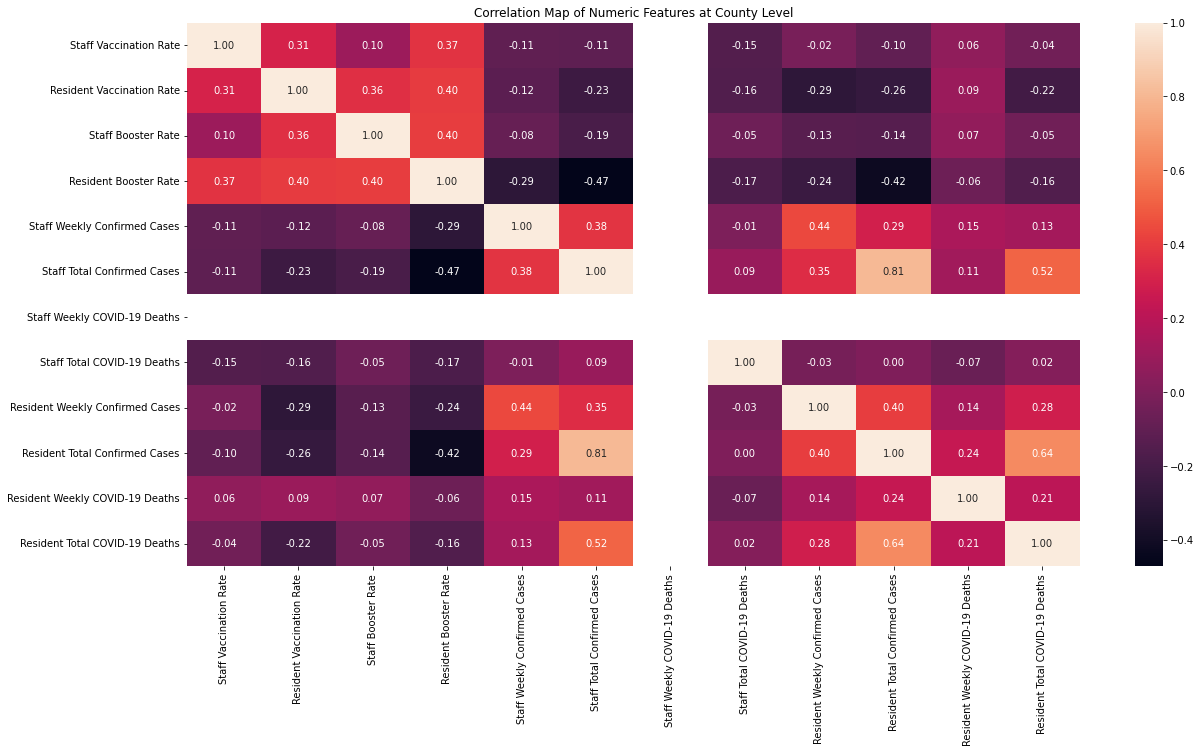

In [24]:
# County level headmaps.
county_mean_corr = all_data.groupby('County').mean().corr()
plt.figure(figsize = (20,10))
fig = sns.heatmap(county_mean_corr, annot=True, fmt='.2f')
fig.set_title("Correlation Map of Numeric Features at County Level")
plt.show()

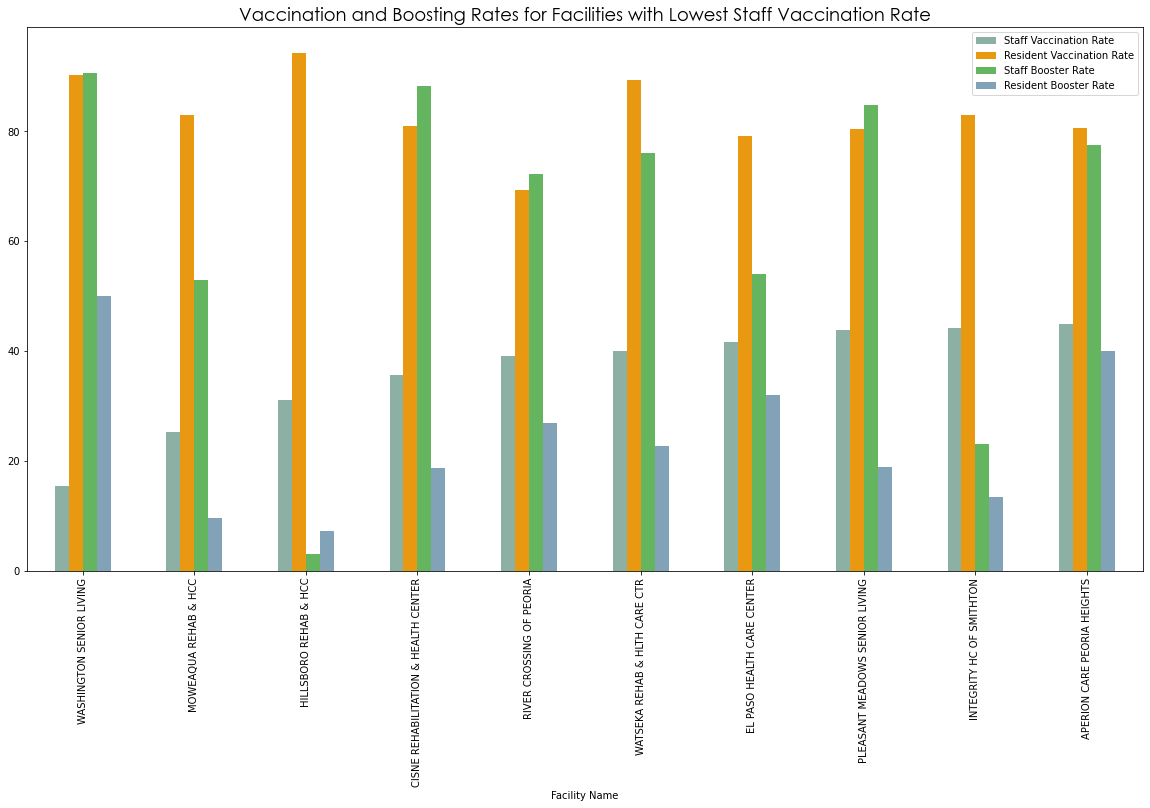

In [25]:
# Facilities with worst vaccination and boosting rates.
all_data.sort_values(rates).head(10).plot(x = 'Facility Name', y=rates, kind='bar', figsize=(20,10), color=colors)
plt.title("Vaccination and Boosting Rates for Facilities with Lowest Staff Vaccination Rate", **cgfont)
plt.show()

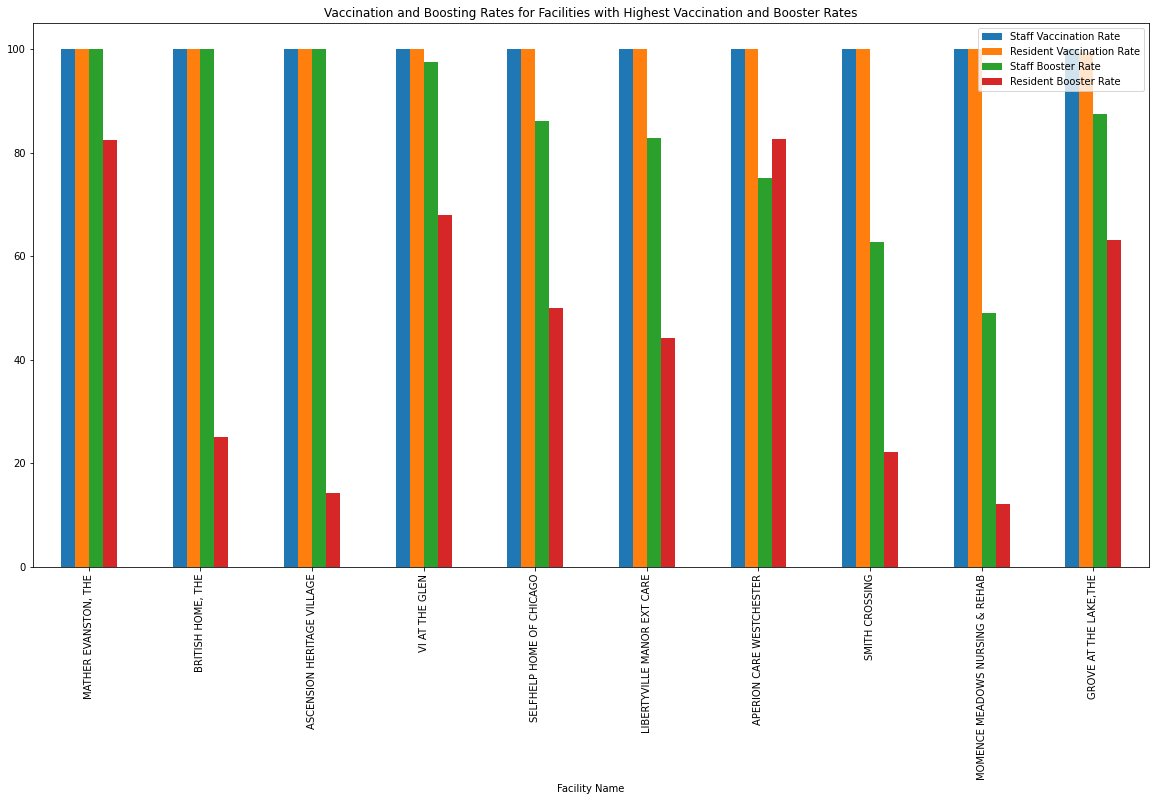

In [26]:
# Facilities with best vaccination and boosting rates.
all_data.sort_values(rates, ascending=False).head(10).plot(x = 'Facility Name', y=rates, kind='bar', figsize=(20,10))
plt.title("Vaccination and Boosting Rates for Facilities with Highest Vaccination and Booster Rates")
plt.show()

## Northern Illinois County Results

In [27]:
northern_counties = ("Boone", "Bureau", "Carroll", "Cook", "DeKalb", "DuPage",
                      "Grundy", "Henry", "Jo Daviess", "Kane", "Kankakee",
                    "Kendall", "Lake", "LaSalle", "Lee", "McHenry",
                    "Mercer", "Ogle", "Putnam", "Rock Island", "Stephenson", "Whiteside",
                     "Will", "Winnebago")

In [28]:
all_data["ResidentVaccination_To_Resident_Cases"] = (all_data['Resident Vaccination Rate'] / all_data['Resident Total Confirmed Cases'])
all_data

all_data["StaffVaccination_To_Staff_Cases"] = (all_data['Staff Vaccination Rate'] / all_data['Staff Total Confirmed Cases'])
all_data

C:\Users\thewe\AppData\Local\Temp/ipykernel_31308/2129517957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["ResidentVaccination_To_Resident_Cases"] = (all_data['Resident Vaccination Rate'] / all_data['Resident Total Confirmed Cases'])
C:\Users\thewe\AppData\Local\Temp/ipykernel_31308/2129517957.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["StaffVaccination_To_Staff_Cases"] = (all_data['Staff Vaccination Rate'] / all_data['Staff Total Confirmed Cases'])


,Facility Name,County,Staff Vaccination Rate,Resident Vaccination Rate,Staff Booster Rate,Resident Booster Rate,Staff Weekly Confirmed Cases,Staff Total Confirmed Cases,Staff Weekly COVID-19 Deaths,Staff Total COVID-19 Deaths,Resident Weekly Confirmed Cases,Resident Total Confirmed Cases,Resident Weekly COVID-19 Deaths,Resident Total COVID-19 Deaths,ResidentVaccination_To_Resident_Cases,StaffVaccination_To_Staff_Cases
0,ABBINGTON REHAB & NURSING CTR,DuPage,95.39,88.68,44.68,40.32,0,27,0,0,3,53,0,7,1.673208,3.532963
2,ACCOLADE HC OF PAXTON ON PELLS,Ford,88.57,92.93,91.30,15.05,4,53,0,0,0,52,0,6,1.787115,1.671132
3,ACCOLADE HEALTHCARE DANVILLE,Vermilion,46.47,74.44,58.21,36.96,8,94,0,0,3,84,0,10,0.886190,0.494362
4,ACCOLADE HEALTHCARE OF PONTIAC,Livingston,82.61,85.90,83.58,38.95,9,57,0,0,11,67,0,6,1.282090,1.449298
5,ACCOLADE PAXTON SENIOR LIVING,Ford,88.78,91.30,69.84,2.30,5,59,0,0,5,83,0,15,1.100000,1.504746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,WILLOWS HEALTH CENTER,Winnebago,88.42,100.00,100.00,50.79,1,36,0,0,0,8,0,0,12.500000,2.456111
699,WINNING WHEELS,Whiteside,67.50,95.06,94.81,33.33,9,65,0,0,0,68,0,4,1.397941,1.038462
700,WINSTON MANOR CNV & NURSING,Cook,100.00,95.65,89.39,72.73,2,23,0,0,6,26,0,6,3.678846,4.347826
701,WOODBRIDGE NURSING PAVILION,Cook,91.95,91.67,85.80,45.00,0,112,0,0,0,199,0,36,0.460653,0.820982


In [29]:
northern_all_data = all_data[all_data['County'].isin(northern_counties)]
northern_all_data

,Facility Name,County,Staff Vaccination Rate,Resident Vaccination Rate,Staff Booster Rate,Resident Booster Rate,Staff Weekly Confirmed Cases,Staff Total Confirmed Cases,Staff Weekly COVID-19 Deaths,Staff Total COVID-19 Deaths,Resident Weekly Confirmed Cases,Resident Total Confirmed Cases,Resident Weekly COVID-19 Deaths,Resident Total COVID-19 Deaths,ResidentVaccination_To_Resident_Cases,StaffVaccination_To_Staff_Cases
0,ABBINGTON REHAB & NURSING CTR,DuPage,95.39,88.68,44.68,40.32,0,27,0,0,3,53,0,7,1.673208,3.532963
6,ADDOLORATA VILLA,Cook,100.00,98.81,83.13,42.78,2,89,0,0,2,81,0,23,1.219877,1.123596
7,"ADMIRAL AT THE LAKE, THE",Cook,96.06,96.55,92.86,48.36,4,60,0,0,0,15,0,9,6.436667,1.601000
8,AHVA CARE OF STICKNEY,Cook,94.92,94.87,91.89,92.86,0,22,0,0,0,16,0,0,5.929375,4.314545
9,AHVA CARE OF WINFIELD,DuPage,82.35,97.58,91.74,30.95,2,73,0,0,2,149,0,7,0.654899,1.128082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,WILLOWS HEALTH CENTER,Winnebago,88.42,100.00,100.00,50.79,1,36,0,0,0,8,0,0,12.500000,2.456111
699,WINNING WHEELS,Whiteside,67.50,95.06,94.81,33.33,9,65,0,0,0,68,0,4,1.397941,1.038462
700,WINSTON MANOR CNV & NURSING,Cook,100.00,95.65,89.39,72.73,2,23,0,0,6,26,0,6,3.678846,4.347826
701,WOODBRIDGE NURSING PAVILION,Cook,91.95,91.67,85.80,45.00,0,112,0,0,0,199,0,36,0.460653,0.820982


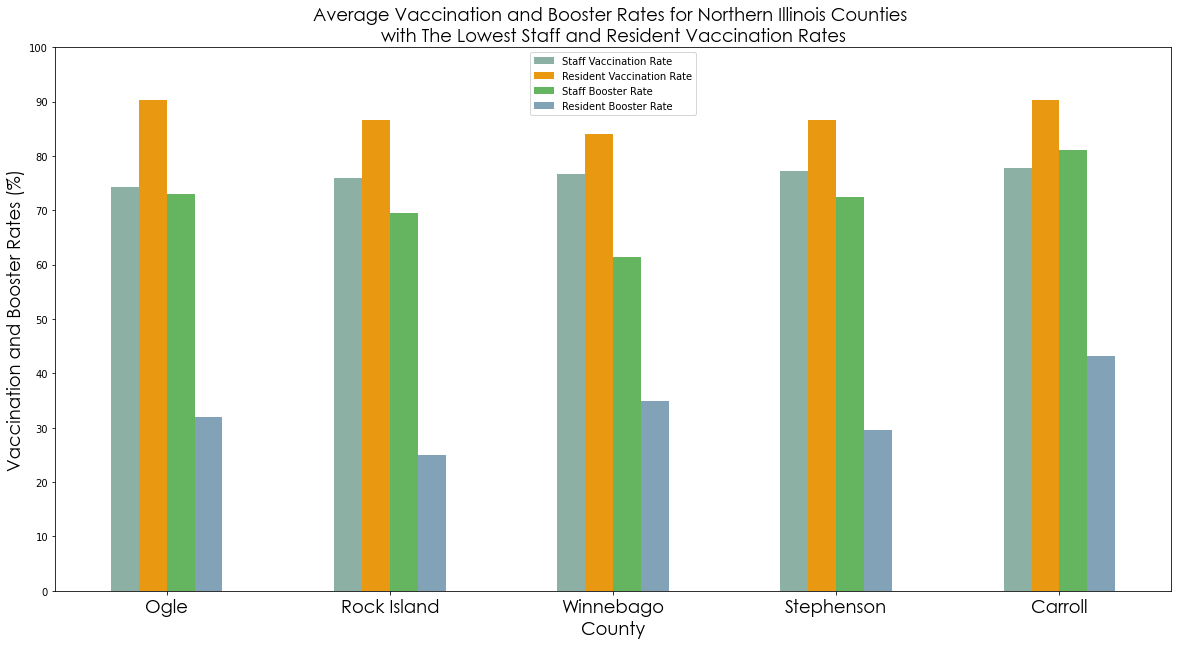

In [30]:
colors = ["#8cb0a3", "#e99812", "#65b460", "#81a2b7"]
northern_all_data.groupby('County').mean().sort_values(rates, ascending=True)[rates].head(5).plot(kind='bar', figsize=(20,10), color=colors)
plt.title("Average Vaccination and Booster Rates for Northern Illinois Counties \nwith The Lowest Staff and Resident Vaccination Rates", **cgfont)
plt.xlabel("County",**cgfont)
plt.yticks(ticks=(0,10,20,30,40,50,60,70,80,90,100))
plt.ylabel("Vaccination and Booster Rates (%)", **cgfont)
plt.xticks(**cgfont, rotation=0)
plt.savefig("../plots/Average_Vaccination_and_Booster_Rates_Northern_Illinois_Counties_Lowest.png")
plt.show()

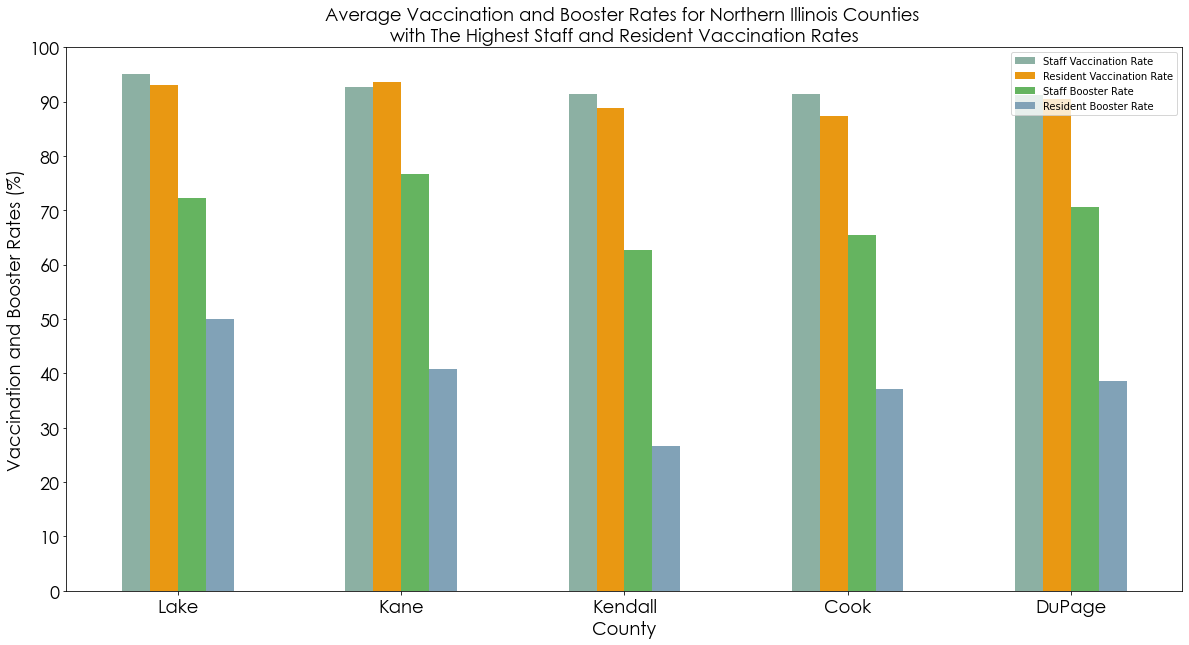

In [63]:
northern_all_data.groupby('County').mean().sort_values(rates, ascending=False)[rates].head(5).plot(kind='bar', figsize=(20,10), color=colors)
plt.title("Average Vaccination and Booster Rates for Northern Illinois Counties \nwith The Highest Staff and Resident Vaccination Rates", **cgfont)
plt.xlabel("County",**cgfont)
plt.yticks(ticks=(0,10,20,30,40,50,60,70,80,90,100),**cgfont)
plt.ylabel("Vaccination and Booster Rates (%)", **cgfont)
plt.xticks(**cgfont, rotation=0)
plt.savefig("../plots/Average_Vaccination_and_Booster_Rates_Northern_Illinois__Counties_Highest.png")
plt.show()

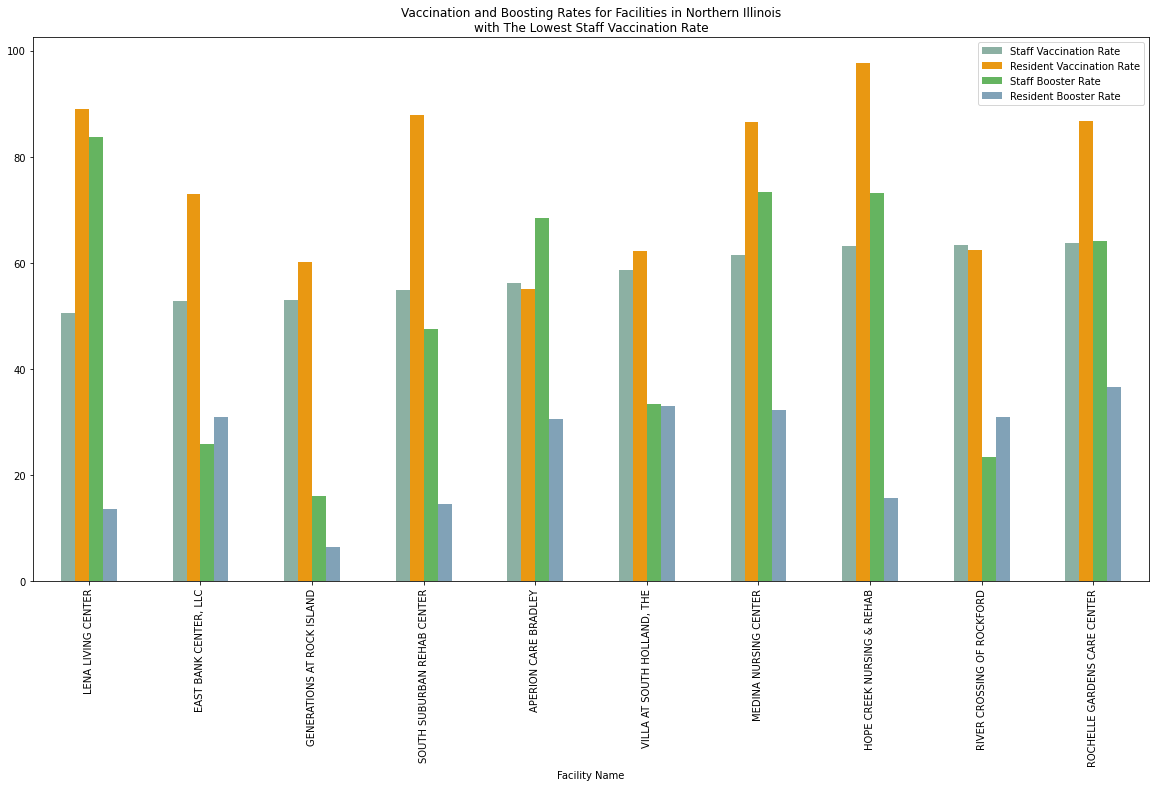

In [32]:
northern_all_data.sort_values('Staff Vaccination Rate').head(10).plot(x = 'Facility Name', y=rates, kind='bar', figsize=(20,10), color=colors)
plt.title("Vaccination and Boosting Rates for Facilities in Northern Illinois\nwith The Lowest Staff Vaccination Rate")
plt.show()

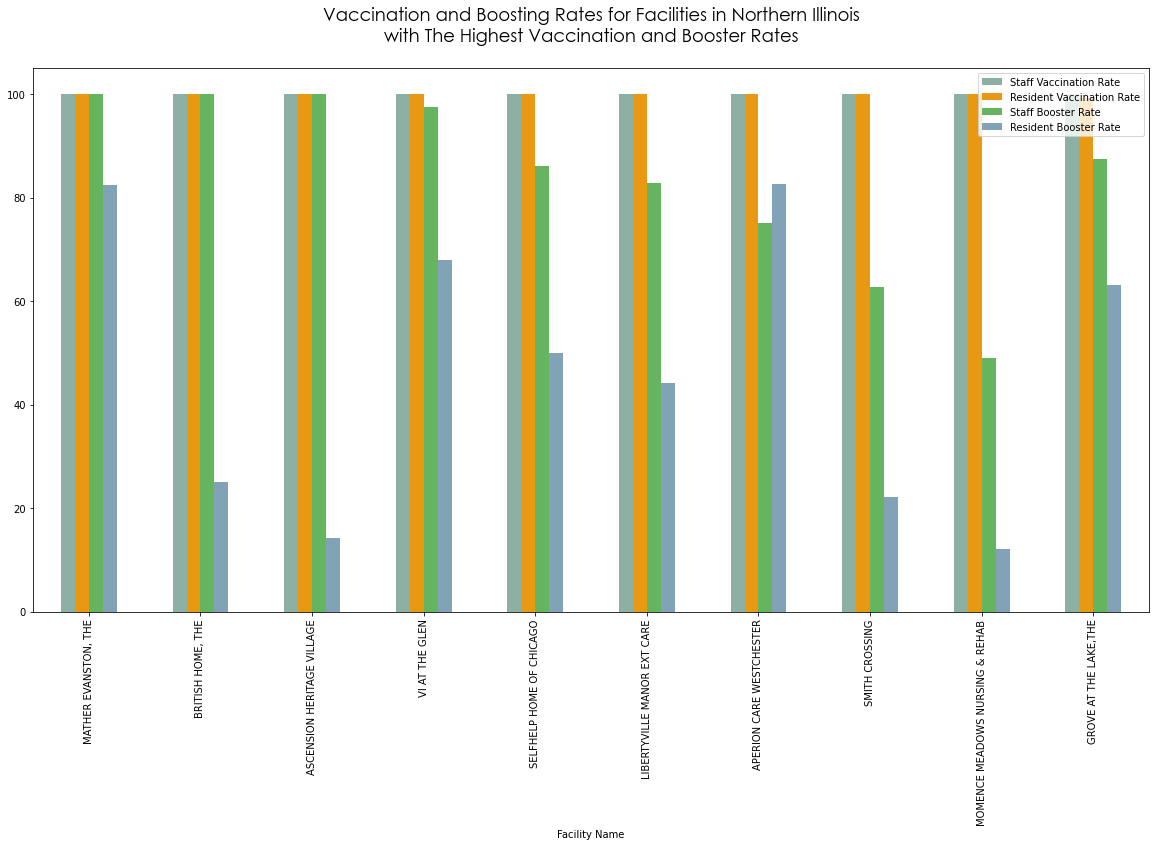

In [33]:
northern_all_data.sort_values(rates, ascending=False).head(10).plot(x = 'Facility Name', y=rates, kind='bar', figsize=(20,10), color=colors)
plt.title("Vaccination and Boosting Rates for Facilities in Northern Illinois\nwith The Highest Vaccination and Booster Rates\n", **cgfont)
plt.show()

In [34]:
northern_all_data_corr = northern_all_data.corr()

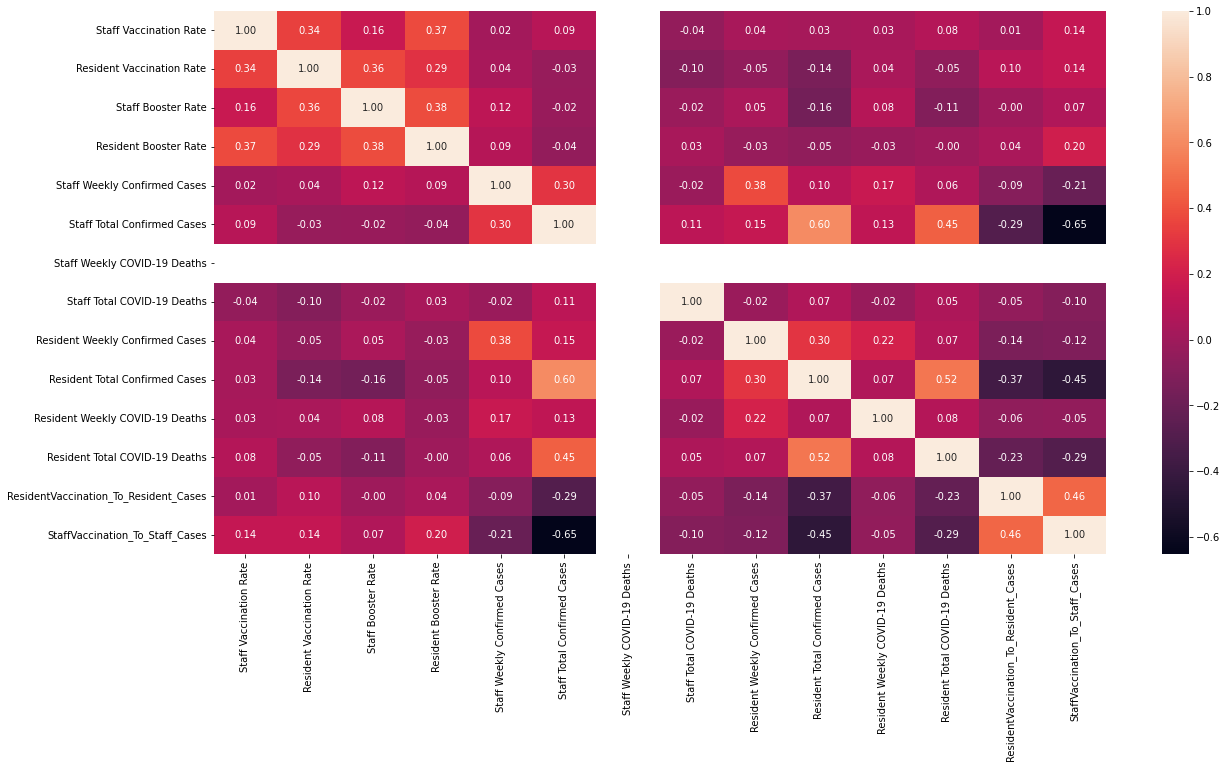

In [35]:
plt.figure(figsize = (20,10))
fig = sns.heatmap(northern_all_data_corr, annot=True, fmt='.2f')

In [36]:
northern_all_data

,Facility Name,County,Staff Vaccination Rate,Resident Vaccination Rate,Staff Booster Rate,Resident Booster Rate,Staff Weekly Confirmed Cases,Staff Total Confirmed Cases,Staff Weekly COVID-19 Deaths,Staff Total COVID-19 Deaths,Resident Weekly Confirmed Cases,Resident Total Confirmed Cases,Resident Weekly COVID-19 Deaths,Resident Total COVID-19 Deaths,ResidentVaccination_To_Resident_Cases,StaffVaccination_To_Staff_Cases
0,ABBINGTON REHAB & NURSING CTR,DuPage,95.39,88.68,44.68,40.32,0,27,0,0,3,53,0,7,1.673208,3.532963
6,ADDOLORATA VILLA,Cook,100.00,98.81,83.13,42.78,2,89,0,0,2,81,0,23,1.219877,1.123596
7,"ADMIRAL AT THE LAKE, THE",Cook,96.06,96.55,92.86,48.36,4,60,0,0,0,15,0,9,6.436667,1.601000
8,AHVA CARE OF STICKNEY,Cook,94.92,94.87,91.89,92.86,0,22,0,0,0,16,0,0,5.929375,4.314545
9,AHVA CARE OF WINFIELD,DuPage,82.35,97.58,91.74,30.95,2,73,0,0,2,149,0,7,0.654899,1.128082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,WILLOWS HEALTH CENTER,Winnebago,88.42,100.00,100.00,50.79,1,36,0,0,0,8,0,0,12.500000,2.456111
699,WINNING WHEELS,Whiteside,67.50,95.06,94.81,33.33,9,65,0,0,0,68,0,4,1.397941,1.038462
700,WINSTON MANOR CNV & NURSING,Cook,100.00,95.65,89.39,72.73,2,23,0,0,6,26,0,6,3.678846,4.347826
701,WOODBRIDGE NURSING PAVILION,Cook,91.95,91.67,85.80,45.00,0,112,0,0,0,199,0,36,0.460653,0.820982


In [37]:
all_data['In Northern Counties'] = all_data['County'].isin(northern_counties)


C:\Users\thewe\AppData\Local\Temp/ipykernel_31308/1869592046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['In Northern Counties'] = all_data['County'].isin(northern_counties)


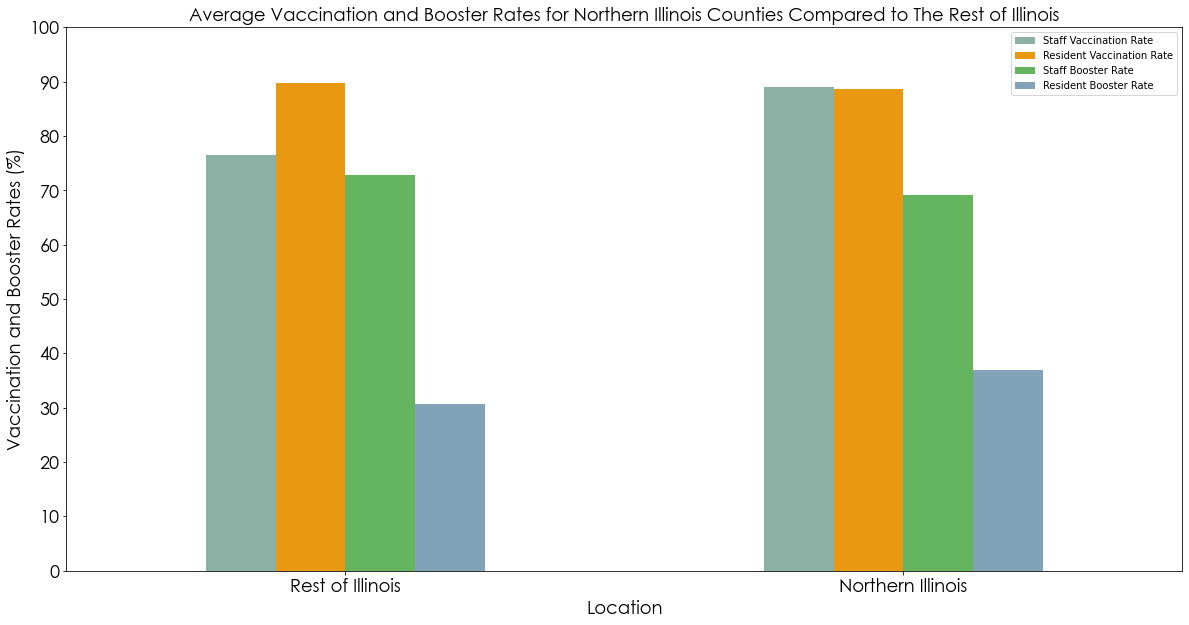

In [64]:
colors = ["#8cb0a3", "#e99812", "#65b460", "#81a2b7"]
all_data.groupby('In Northern Counties')[rates].mean().plot(kind='bar', figsize=(20,10), color = colors)
plt.title("Average Vaccination and Booster Rates for Northern Illinois Counties Compared to The Rest of Illinois", **cgfont)
plt.xlabel('Location', **cgfont)
plt.xticks(ticks=(False,True),labels=('Rest of Illinois', 'Northern Illinois'), rotation=0, **cgfont)
plt.yticks(ticks=(0,10,20,30,40,50,60,70,80,90,100), **cgfont)
plt.ylabel("Vaccination and Booster Rates (%)", **cgfont)
plt.savefig("../plots/Average_Vaccination_and_Booster_Rates_Northern_Illinois_Counties_Comparison.png")
plt.show()

## Ratios

In [39]:
all_data["StaffVaccination_To_Resident_Vaccination"] = (all_data['Staff Vaccination Rate'] / all_data['Resident Vaccination Rate'])
all_data

C:\Users\thewe\AppData\Local\Temp/ipykernel_31308/2715452885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["StaffVaccination_To_Resident_Vaccination"] = (all_data['Staff Vaccination Rate'] / all_data['Resident Vaccination Rate'])


,Facility Name,County,Staff Vaccination Rate,Resident Vaccination Rate,Staff Booster Rate,Resident Booster Rate,Staff Weekly Confirmed Cases,Staff Total Confirmed Cases,Staff Weekly COVID-19 Deaths,Staff Total COVID-19 Deaths,Resident Weekly Confirmed Cases,Resident Total Confirmed Cases,Resident Weekly COVID-19 Deaths,Resident Total COVID-19 Deaths,ResidentVaccination_To_Resident_Cases,StaffVaccination_To_Staff_Cases,In Northern Counties,StaffVaccination_To_Resident_Vaccination
0,ABBINGTON REHAB & NURSING CTR,DuPage,95.39,88.68,44.68,40.32,0,27,0,0,3,53,0,7,1.673208,3.532963,True,1.075665
2,ACCOLADE HC OF PAXTON ON PELLS,Ford,88.57,92.93,91.30,15.05,4,53,0,0,0,52,0,6,1.787115,1.671132,False,0.953083
3,ACCOLADE HEALTHCARE DANVILLE,Vermilion,46.47,74.44,58.21,36.96,8,94,0,0,3,84,0,10,0.886190,0.494362,False,0.624261
4,ACCOLADE HEALTHCARE OF PONTIAC,Livingston,82.61,85.90,83.58,38.95,9,57,0,0,11,67,0,6,1.282090,1.449298,False,0.961700
5,ACCOLADE PAXTON SENIOR LIVING,Ford,88.78,91.30,69.84,2.30,5,59,0,0,5,83,0,15,1.100000,1.504746,False,0.972399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,WILLOWS HEALTH CENTER,Winnebago,88.42,100.00,100.00,50.79,1,36,0,0,0,8,0,0,12.500000,2.456111,True,0.884200
699,WINNING WHEELS,Whiteside,67.50,95.06,94.81,33.33,9,65,0,0,0,68,0,4,1.397941,1.038462,True,0.710078
700,WINSTON MANOR CNV & NURSING,Cook,100.00,95.65,89.39,72.73,2,23,0,0,6,26,0,6,3.678846,4.347826,True,1.045478
701,WOODBRIDGE NURSING PAVILION,Cook,91.95,91.67,85.80,45.00,0,112,0,0,0,199,0,36,0.460653,0.820982,True,1.003054


In [40]:
all_data.sort_values("StaffVaccination_To_Resident_Vaccination").head(10)

,Facility Name,County,Staff Vaccination Rate,Resident Vaccination Rate,Staff Booster Rate,Resident Booster Rate,Staff Weekly Confirmed Cases,Staff Total Confirmed Cases,Staff Weekly COVID-19 Deaths,Staff Total COVID-19 Deaths,Resident Weekly Confirmed Cases,Resident Total Confirmed Cases,Resident Weekly COVID-19 Deaths,Resident Total COVID-19 Deaths,ResidentVaccination_To_Resident_Cases,StaffVaccination_To_Staff_Cases,In Northern Counties,StaffVaccination_To_Resident_Vaccination
676,WASHINGTON SENIOR LIVING,Tazewell,15.39,90.24,90.54,50.00,0,50,0,0,0,81,0,12,1.114074,0.307800,False,0.170545
466,MOWEAQUA REHAB & HCC,Shelby,25.30,82.93,52.94,9.52,11,62,0,0,6,51,0,3,1.626078,0.408065,False,0.305077
361,HILLSBORO REHAB & HCC,Montgomery,31.11,94.29,3.03,7.14,8,126,0,4,0,91,0,29,1.036154,0.246905,False,0.329940
179,CISNE REHABILITATION & HEALTH CENTER,Wayne,35.56,80.95,88.24,18.75,0,29,0,0,0,20,0,2,4.047500,1.226207,False,0.439284
679,WATSEKA REHAB & HLTH CARE CTR,Iroquois,40.00,89.29,76.00,22.73,1,42,0,1,0,55,0,8,1.623455,0.952381,False,0.447978
527,PRAIRIE ROSE HEALTH CARE CTR,Christian,50.94,97.44,81.58,40.74,2,35,0,0,0,41,0,6,2.376585,1.455429,False,0.522783
226,EL PASO HEALTH CARE CENTER,Woodford,41.67,79.22,54.10,32.00,3,28,0,0,2,71,0,1,1.115775,1.488214,False,0.526004
256,FIRESIDE HOUSE OF CENTRALIA,Marion,53.06,100.00,100.00,88.46,0,50,0,0,0,39,0,6,2.564103,1.061200,False,0.530600
380,INTEGRITY HC OF SMITHTON,St. Clair,44.12,82.98,23.08,13.33,2,45,0,0,0,48,0,5,1.728750,0.980444,False,0.531694
585,SHARON HEALTH CARE PINES,Peoria,52.63,96.91,94.68,42.50,4,51,0,0,0,71,0,1,1.364930,1.031961,False,0.543081


## Places with abnormally high weekly cases.

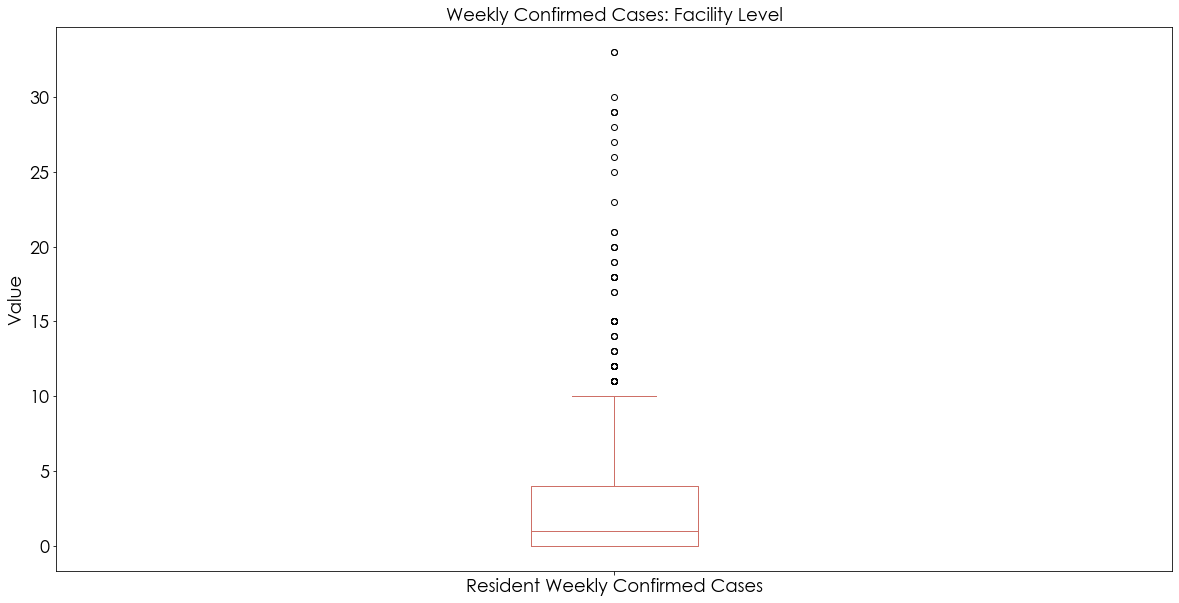

In [41]:
long_term_care_data[['Facility Name', 'Resident Weekly Confirmed Cases']].plot(kind='box', figsize=(20,10), color = "#CE7067")
plt.ylabel("Value" ,**cgfont)
plt.xticks(**cgfont)
plt.yticks(**cgfont)
plt.title("Weekly Confirmed Cases: Facility Level", **cgfont)
plt.savefig("../plots/Weekly_Confirmed_Cases_Illinois_boxplot.png")
plt.show()

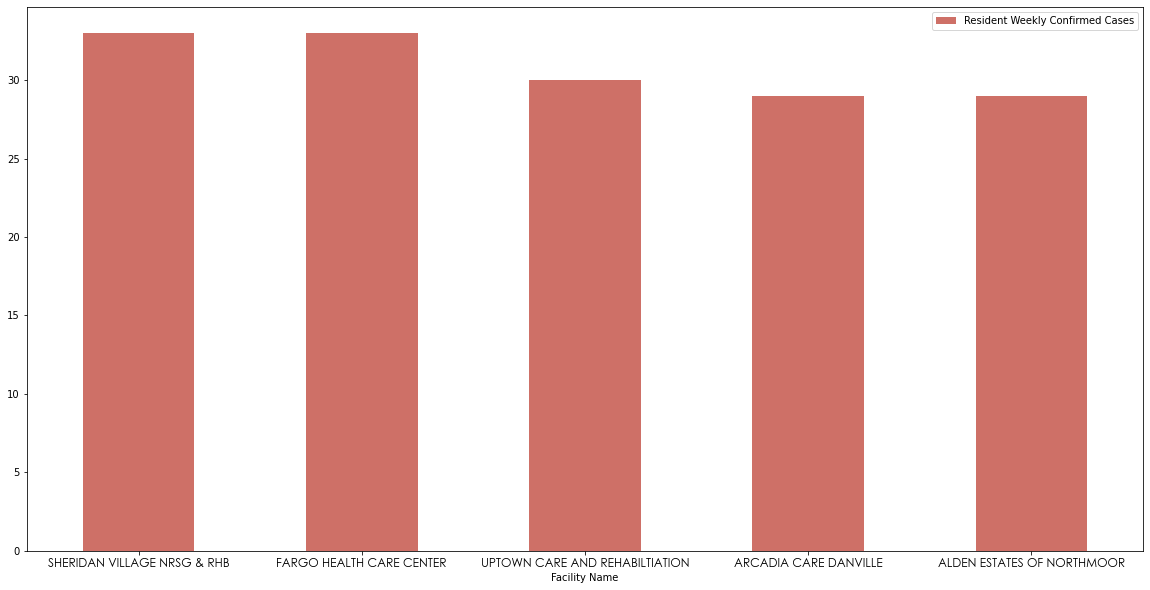

In [42]:
long_term_care_data[['Facility Name', 'Resident Weekly Confirmed Cases']].sort_values('Resident Weekly Confirmed Cases', ascending=False).head(5).plot(x='Facility Name', kind='bar', color="#CE7067", figsize=(20,10))
plt.xticks(rotation=0, **cgfont_small)
plt.show()

In [43]:
resident_cases = ['Resident Weekly Confirmed Cases']
long_term_care_data.sort_values(resident_cases, ascending=False)[['Facility Name', 'Resident Weekly Confirmed Cases']].head(10)

,Facility Name,Resident Weekly Confirmed Cases
591,SHERIDAN VILLAGE NRSG & RHB,33
252,FARGO HEALTH CARE CENTER,33
656,UPTOWN CARE AND REHABILTIATION,30
84,ARCADIA CARE DANVILLE,29
18,ALDEN ESTATES OF NORTHMOOR,29
73,APERION CARE WEST CHICAGO,29
525,PRAIRIE MANOR NRSG & REHAB CTR,28
171,CENTRAL NURSING HOME,27
626,SYMPHONY OF BRONZEVILLE,26
490,PALM TERRACE OF MATTOON,25


In [44]:
northern_all_data_res_vacc_to_res_cases = northern_all_data.groupby('County').mean()[['ResidentVaccination_To_Resident_Cases']]
northern_all_data_res_vacc_to_res_cases

,ResidentVaccination_To_Resident_Cases
County,
Boone,1.499679
Bureau,1.785774
Carroll,3.098518
Cook,1.997174
DeKalb,9.147287
DuPage,2.672879
Grundy,1.709322
Henry,1.870652
Jo Daviess,3.405357


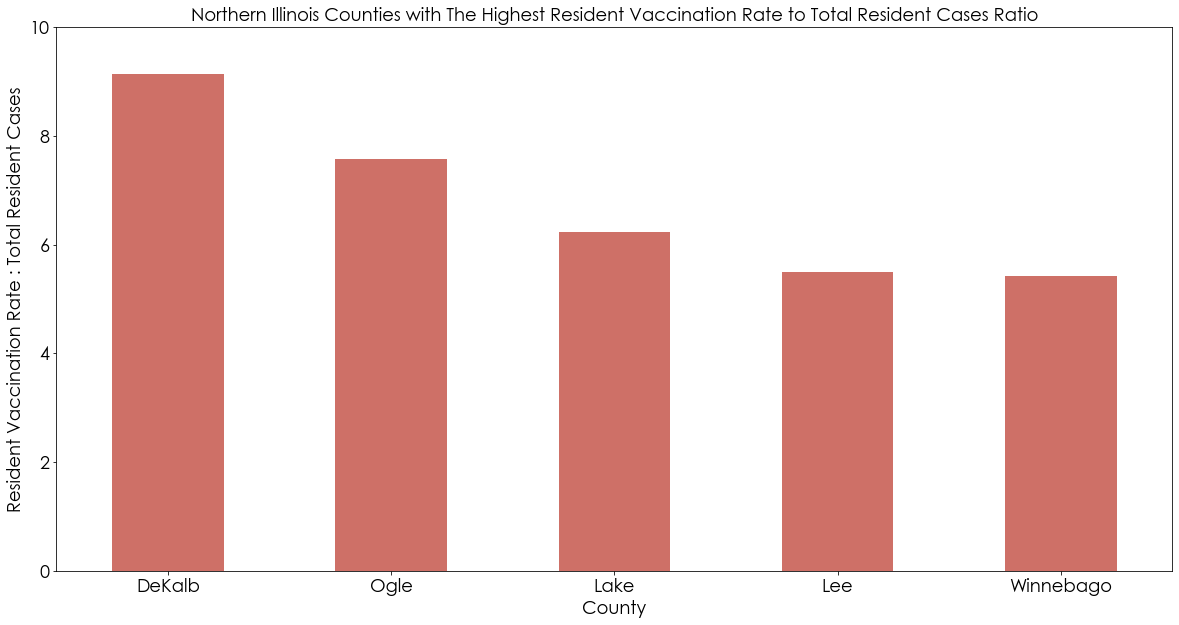

In [45]:
northern_all_data_res_vacc_to_res_cases.sort_values('ResidentVaccination_To_Resident_Cases', ascending=False).head(5).plot(kind='bar', figsize=(20,10), legend=False, color="#CE7067")
plt.xticks(rotation=0, **cgfont)
plt.title("Northern Illinois Counties with The Highest Resident Vaccination Rate to Total Resident Cases Ratio", **cgfont)
plt.xlabel("County", **cgfont)
plt.ylabel("Resident Vaccination Rate : Total Resident Cases", **cgfont)
plt.yticks([0,2,4,6,8,10], **cgfont)
plt.savefig("../plots/Northern_Illinois_Counties_with_The_Highest_Resident_Vaccination_Rate_to_Total_Resident_Cases_Ratio.png")
plt.show()

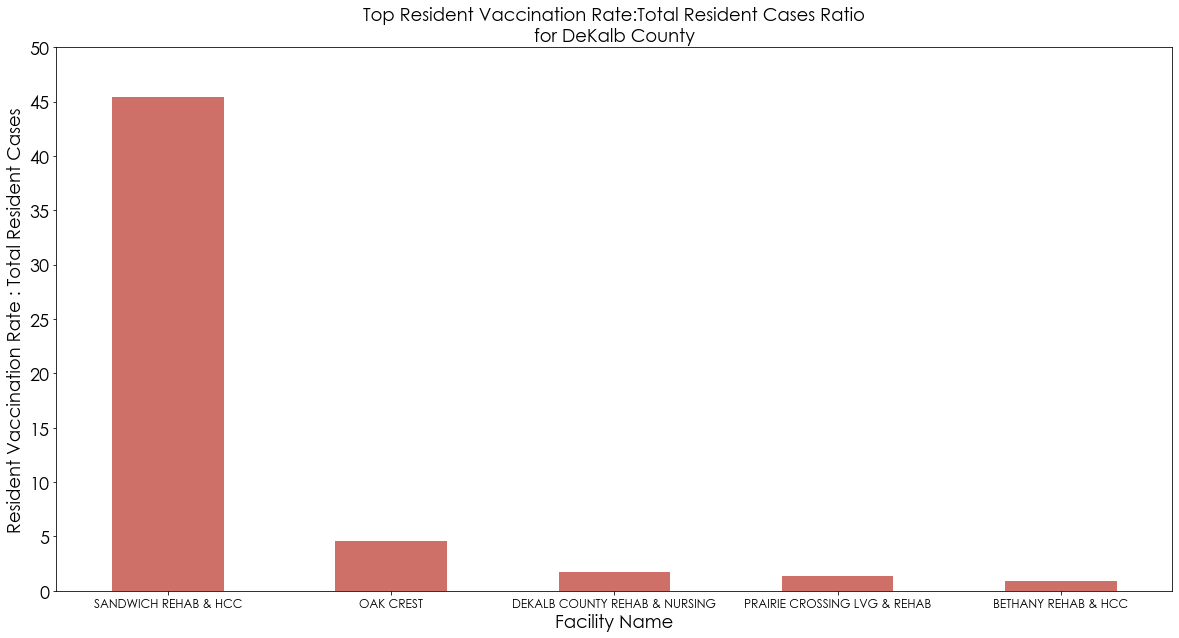

In [46]:
northern_all_data[northern_all_data.County == 'DeKalb'].sort_values('ResidentVaccination_To_Resident_Cases', ascending=False).head(5).plot(x = "Facility Name", y ='ResidentVaccination_To_Resident_Cases', kind='bar', figsize=(20,10), legend=False, color="#CE7067")
plt.xlabel("Facility Name",**cgfont)
plt.ylabel("Resident Vaccination Rate : Total Resident Cases", **cgfont)
plt.xticks(rotation=0, **cgfont_small)
plt.yticks([0,5,10,15,20,25,30,35,40,45,50], **cgfont)
plt.title("Top Resident Vaccination Rate:Total Resident Cases Ratio\nfor DeKalb County", **cgfont)
plt.savefig("../plots/Top_Resident_Vaccination_Rate_to_Total_Resident_Cases_Ratio_for_DeKalb_County.png")
plt.show()

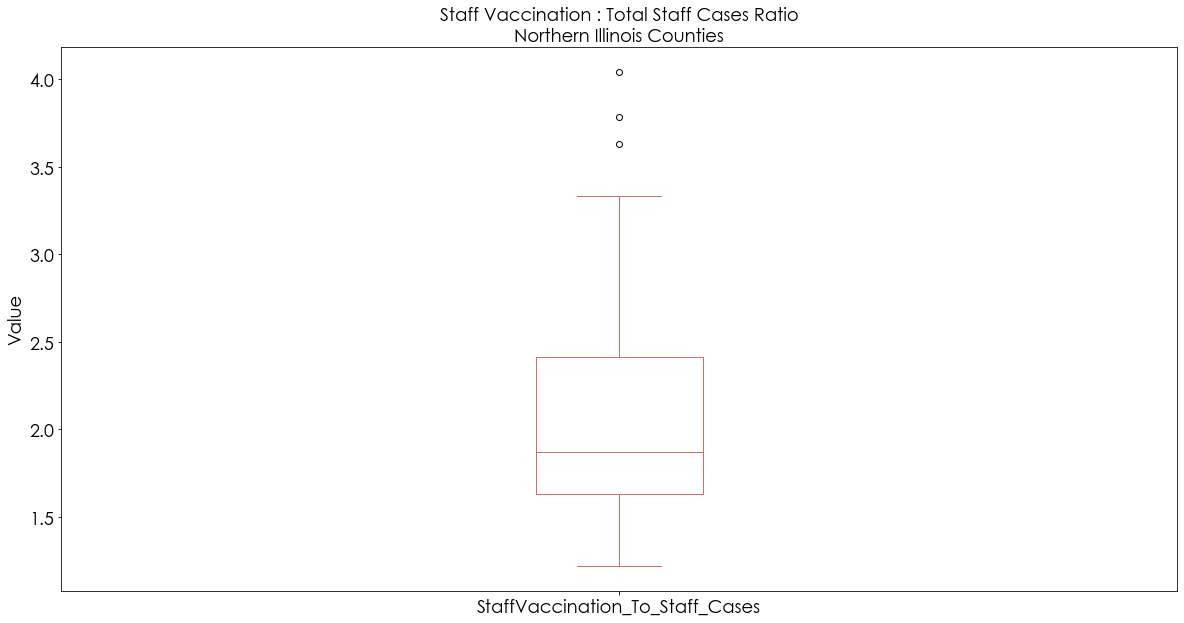

In [47]:
northern_all_data_staff_vacc_to_staff_cases = northern_all_data.groupby('County').mean()[['StaffVaccination_To_Staff_Cases']]
northern_all_data_staff_vacc_to_staff_cases.plot(kind='box', figsize=(20,10), color = "#CE7067")
plt.ylabel("Value" ,**cgfont)
plt.xticks(**cgfont)
plt.yticks(**cgfont)
plt.title("Staff Vaccination : Total Staff Cases Ratio\nNorthern Illinois Counties", **cgfont)
plt.savefig("../plots/Staff_Vaccination_to_Total_Staff_Cases Ratio_boxplot.png")
plt.show()

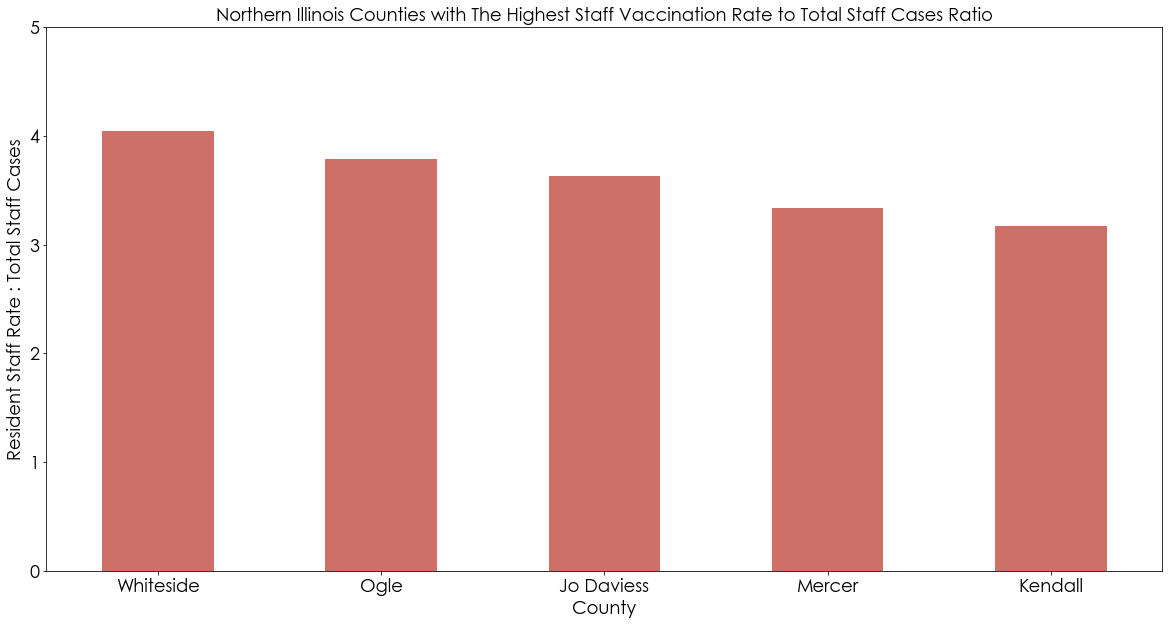

In [48]:
northern_all_data_staff_vacc_to_staff_cases.sort_values('StaffVaccination_To_Staff_Cases', ascending=False).head(5).plot(kind='bar', figsize=(20,10), legend=False, color="#CE7067")
plt.xticks(rotation=0, **cgfont)
plt.title("Northern Illinois Counties with The Highest Staff Vaccination Rate to Total Staff Cases Ratio", **cgfont)
plt.xlabel("County", **cgfont)
plt.ylabel("Resident Staff Rate : Total Staff Cases", **cgfont)
plt.yticks([0,1,2,3,4,5], **cgfont)
plt.savefig("../plots/Northern_Illinois_Counties_with_The_Highest_Staff_Vaccination_Rate_to_Total_Staff_Cases_Ratio.png")
plt.show()

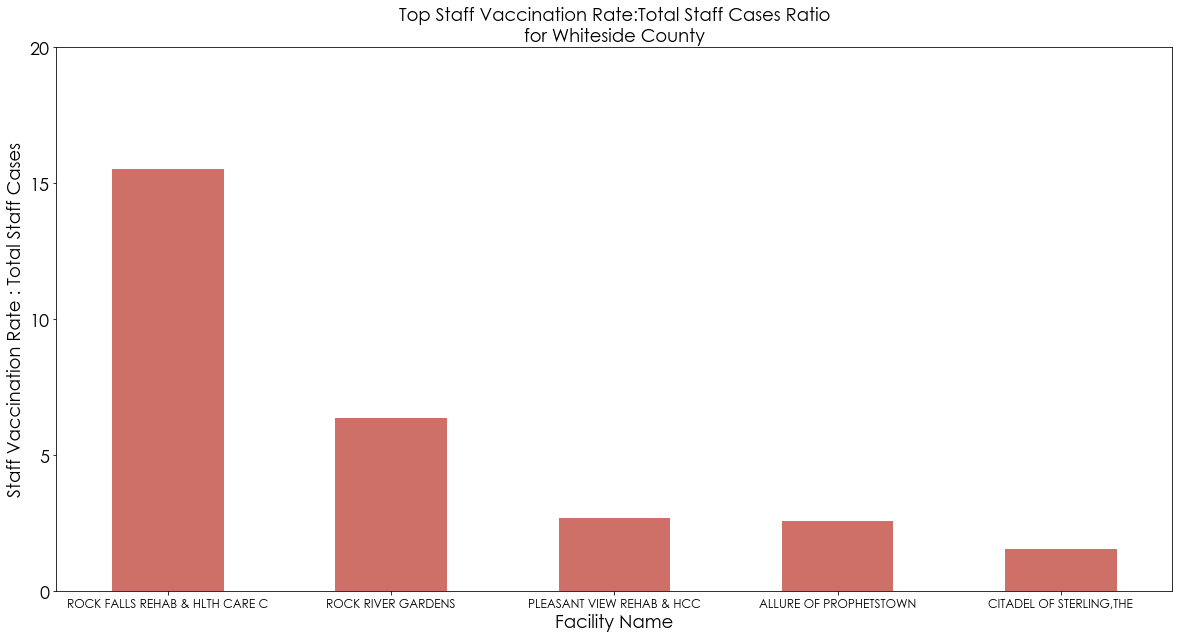

In [49]:
northern_all_data[northern_all_data.County == 'Whiteside'].sort_values('StaffVaccination_To_Staff_Cases', ascending=False).head(5).plot(x = "Facility Name", y ='StaffVaccination_To_Staff_Cases', kind='bar', figsize=(20,10), legend=False, color="#CE7067")
plt.xlabel("Facility Name",**cgfont)
plt.ylabel("Staff Vaccination Rate : Total Staff Cases", **cgfont)
plt.xticks(rotation=0, **cgfont_small)
plt.yticks([0,5, 10, 15, 20], **cgfont)
plt.title("Top Staff Vaccination Rate:Total Staff Cases Ratio\nfor Whiteside County", **cgfont)
plt.savefig("../plots/Top_Staff_Vaccination_Rate_to_Total_Staff_Cases_Ratio_for_Whiteside_County.png")
plt.show()

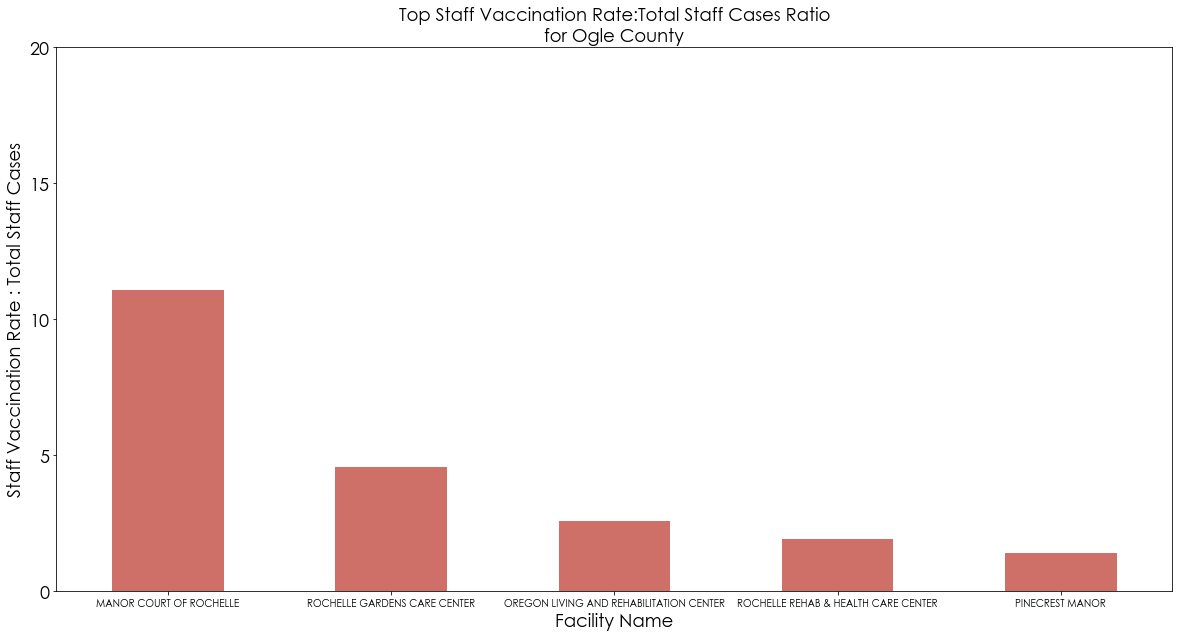

In [50]:
northern_all_data[northern_all_data.County == 'Ogle'].sort_values('StaffVaccination_To_Staff_Cases', ascending=False).head(5).plot(x = "Facility Name", y ='StaffVaccination_To_Staff_Cases', kind='bar', figsize=(20,10), legend=False, color="#CE7067")
plt.xlabel("Facility Name",**cgfont)
plt.ylabel("Staff Vaccination Rate : Total Staff Cases", **cgfont)
plt.xticks(rotation=0, **cgfont_smaller)
plt.yticks([0,5, 10, 15, 20], **cgfont)
plt.title("Top Staff Vaccination Rate:Total Staff Cases Ratio\nfor Ogle County", **cgfont)
plt.savefig("../plots/Top_Staff_Vaccination_Rate_to_Total_Staff_Cases_Ratio_for_Ogle_County.png")
plt.show()

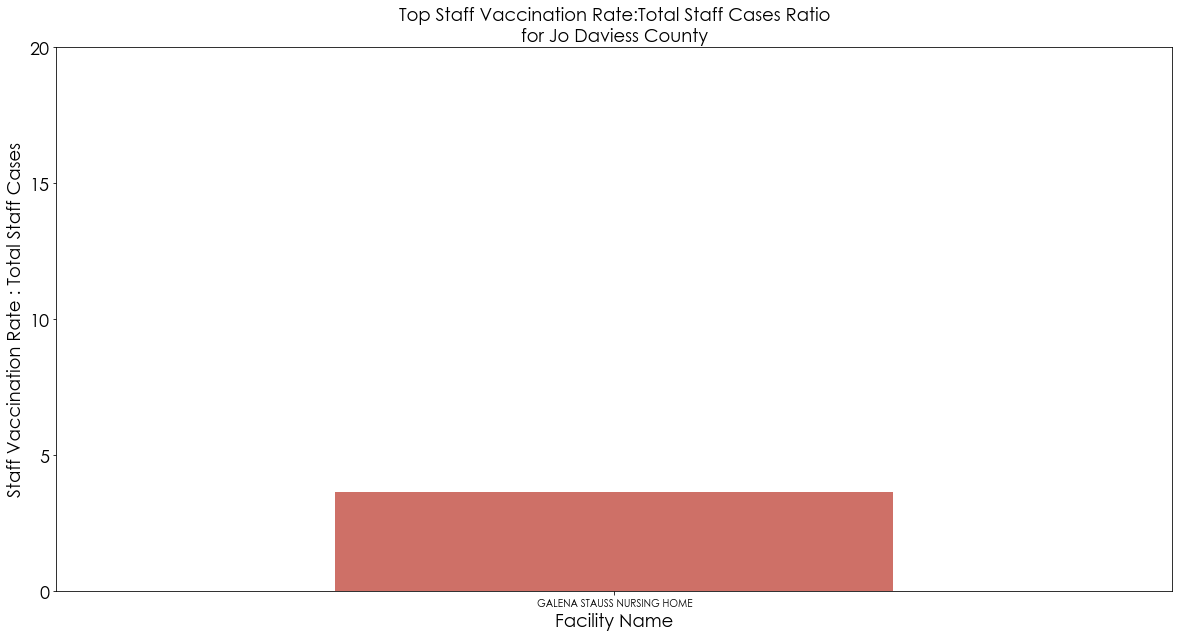

In [51]:
northern_all_data[northern_all_data.County == 'Jo Daviess'].sort_values('StaffVaccination_To_Staff_Cases', ascending=False).head(5).plot(x = "Facility Name", y ='StaffVaccination_To_Staff_Cases', kind='bar', figsize=(20,10), legend=False, color="#CE7067")
plt.xlabel("Facility Name",**cgfont)
plt.ylabel("Staff Vaccination Rate : Total Staff Cases", **cgfont)
plt.xticks(rotation=0, **cgfont_smaller)
plt.yticks([0,5, 10, 15, 20], **cgfont)
plt.title("Top Staff Vaccination Rate:Total Staff Cases Ratio\nfor Jo Daviess County", **cgfont)
plt.savefig("../plots/Top_Staff_Vaccination_Rate_to_Total_Staff_Cases_Ratio_for_Jo_Daviess_County.png")
plt.show()

<AxesSubplot:>

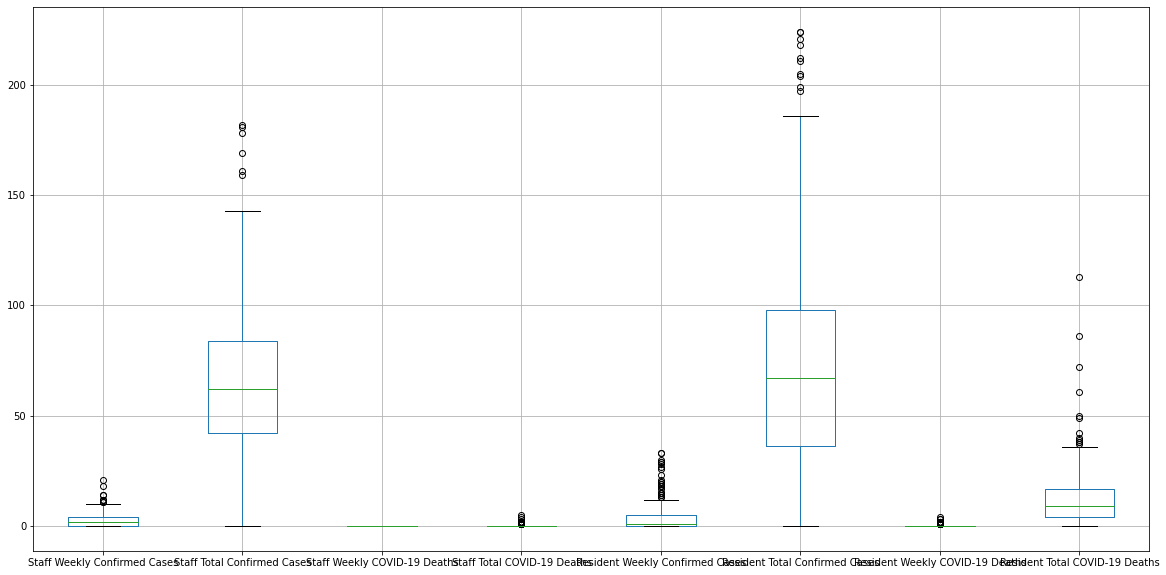

In [52]:
long_term_care_data[long_term_care_data.County.isin(northern_counties)].boxplot(figsize=(20,10))

In [65]:
northern_all_data.groupby('County').mean()

,Staff Vaccination Rate,Resident Vaccination Rate,Staff Booster Rate,Resident Booster Rate,Staff Weekly Confirmed Cases,Staff Total Confirmed Cases,Staff Weekly COVID-19 Deaths,Staff Total COVID-19 Deaths,Resident Weekly Confirmed Cases,Resident Total Confirmed Cases,Resident Weekly COVID-19 Deaths,Resident Total COVID-19 Deaths,ResidentVaccination_To_Resident_Cases,StaffVaccination_To_Staff_Cases
County,,,,,,,,,,,,,,
Boone,90.336667,87.236667,88.356667,39.140000,1.333333,53.333333,0.0,0.000000,1.000000,60.333333,0.333333,14.666667,1.499679,1.789383
Bureau,85.336667,89.706667,85.483333,33.640000,3.333333,48.333333,0.0,0.000000,2.000000,64.000000,0.333333,8.666667,1.785774,2.045907
Carroll,77.740000,90.230000,81.150000,43.110000,0.000000,41.000000,0.0,0.000000,0.000000,39.500000,0.000000,8.000000,3.098518,2.552258
Cook,91.347778,87.280265,65.361005,37.155397,2.074074,69.338624,0.0,0.206349,4.306878,84.317460,0.126984,13.174603,1.997174,1.703716
DeKalb,84.286667,89.486667,80.430000,36.430000,2.666667,76.333333,0.0,0.000000,1.166667,54.666667,0.166667,8.000000,9.147287,1.646090
DuPage,91.141111,90.557222,70.560000,38.652222,2.472222,63.833333,0.0,0.111111,4.611111,76.055556,0.111111,9.750000,2.672879,1.764149
Grundy,79.045000,91.350000,76.260000,26.780000,2.500000,50.000000,0.0,0.000000,0.500000,53.500000,0.000000,7.000000,1.709322,1.593870
Henry,83.648000,90.700000,76.748000,31.884000,3.000000,49.400000,0.0,0.200000,3.800000,64.800000,0.400000,7.400000,1.870652,1.987391
Jo Daviess,90.700000,95.350000,92.680000,61.540000,0.000000,25.000000,0.0,0.000000,7.000000,28.000000,0.000000,9.000000,3.405357,3.628000
